In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
co2=pd.read_csv('co2_emissions.csv',sep=';')
co2

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [5]:
co2['make']=co2['make'].str.upper()
co2['model']=co2['model'].str.upper()
co2['vehicle_class']=co2['vehicle_class'].str.upper()
co2['fuel_type']=co2['fuel_type'].str.upper()
co2['transmission']=co2['transmission'].str.upper()

In [6]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [7]:
co2=co2.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_consumpution','fuel_consumption_comb(mpg)':'fuel_consumption_mpg'})

In [8]:
co2

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [9]:
missing_value=pd.DataFrame({
    'Missing Value':co2.isnull().sum(),
    'Percentage':(co2.isnull().sum()/len(co2))*100
})
missing_value.sort_values(by='Percentage',ascending=False)

,Missing Value,Percentage
make,0,0.0
model,0,0.0
vehicle_class,0,0.0
engine_size,0,0.0
cylinders,0,0.0
transmission,0,0.0
fuel_type,0,0.0
fuel_consumption_city,0,0.0
fuel_consumption_hwy,0,0.0
fuel_consumpution,0,0.0


In [10]:
co2.duplicated().sum()

1404

In [11]:
co2 = co2.drop_duplicates()
co2

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [12]:
co2 = co2.reset_index()
co2

,index,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
5977,7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
5978,7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
5979,7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [13]:
data=co2

In [14]:
data=data.drop('index',axis=1)
data=data.drop('fuel_consumption_hwy',axis=1)
data=data.drop('fuel_consumption_city',axis=1)
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
5976,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.4,30,219
5977,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.9,29,232
5978,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,10.3,27,240
5979,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,9.9,29,232


In [15]:
data.shape

(5981, 10)

In [16]:
data.describe()

,engine_size,cylinders,fuel_consumpution,fuel_consumption_mpg,co2_emissions
count,5981.000000,5981.000000,5981.000000,5981.000000,5981.000000
mean,3.173834,5.634509,11.053035,27.313994,251.715432
std,1.365464,1.849660,2.955585,7.165837,59.178224
min,0.900000,3.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,10.600000,27.000000,246.000000
75%,3.800000,6.000000,12.700000,32.000000,290.000000
max,8.400000,16.000000,26.100000,69.000000,522.000000


In [17]:
data.describe(include = object)

,make,model,vehicle_class,transmission,fuel_type
count,5981,5981,5981,5981,5981
unique,42,1596,16,5,5
top,FORD,MUSTANG,SUV - SMALL,AS,X
freq,561,32,959,2633,2869


In [18]:
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
5976,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.4,30,219
5977,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.9,29,232
5978,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,10.3,27,240
5979,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,9.9,29,232


In [19]:
data.shape

(5981, 10)

In [20]:
#plt.subplots(figsize=(15, 6))
#pd.crosstab(data["co2_emissions"],data['model']).mean().plot(kind='bar')

<Axes: xlabel='co2_emissions', ylabel='make'>

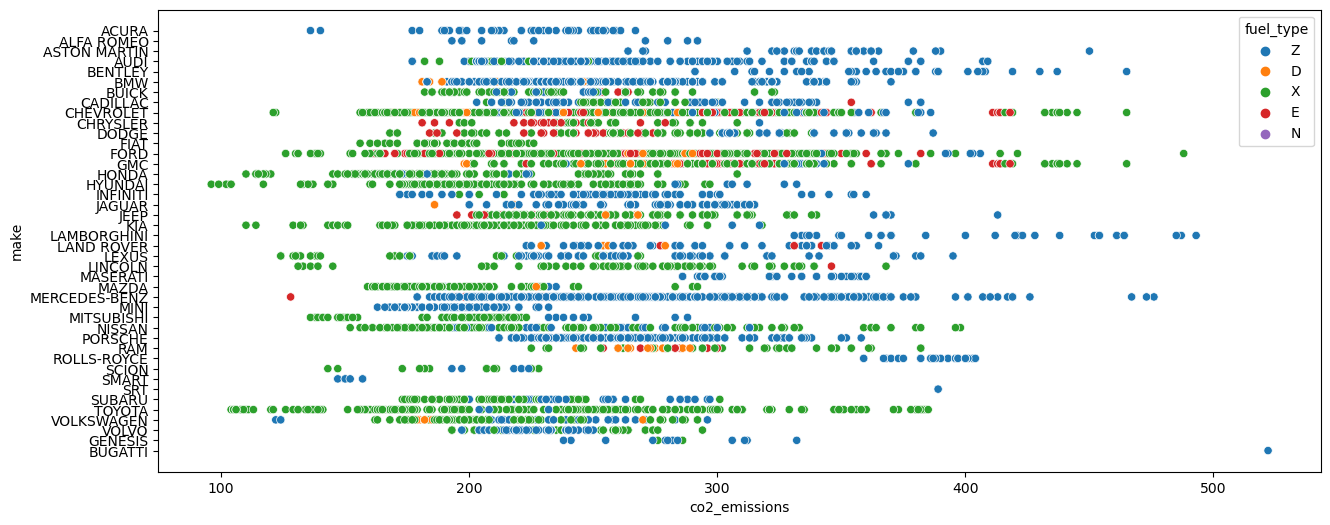

In [21]:
plt.subplots(figsize=(15, 6))
sb.scatterplot(x=data['co2_emissions'],y=data['make'],data=data,hue='fuel_type')

<Axes: xlabel='co2_emissions', ylabel='vehicle_class'>

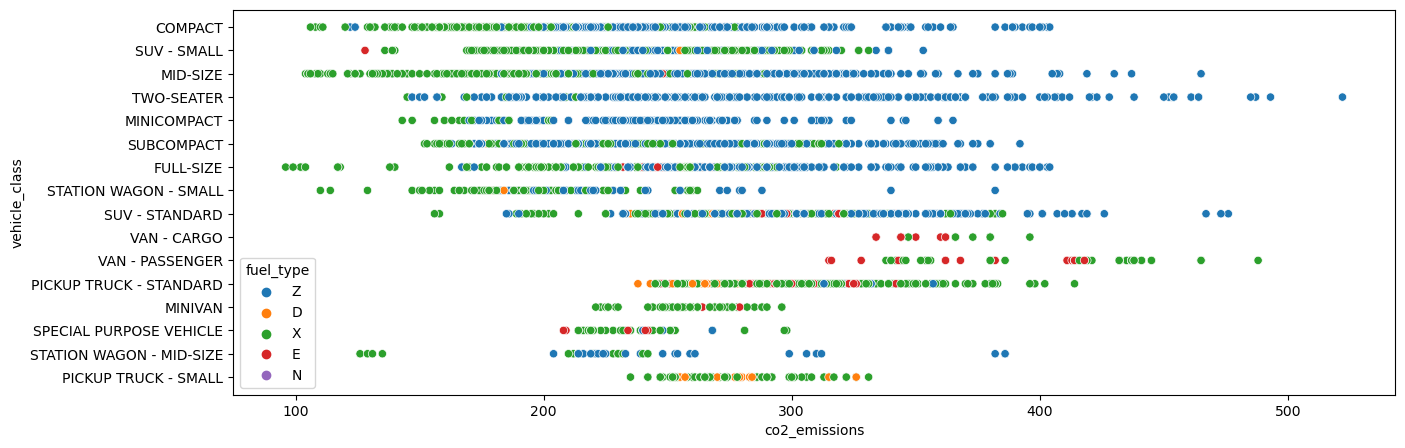

In [22]:
plt.subplots(figsize=(15, 5))
sb.scatterplot(x=data['co2_emissions'],y=data['vehicle_class'],data=data,hue='fuel_type')

<Axes: xlabel='co2_emissions', ylabel='engine_size'>

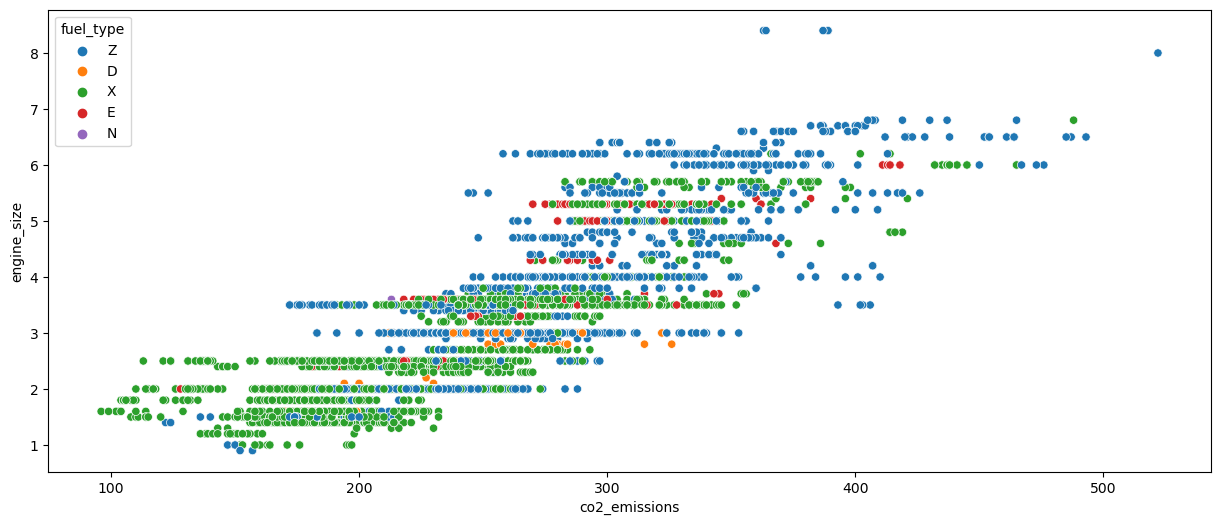

In [23]:
plt.subplots(figsize=(15, 6))
sb.scatterplot(x=data['co2_emissions'],y=data['engine_size'],data=data,hue='fuel_type')

<Axes: xlabel='co2_emissions', ylabel='cylinders'>

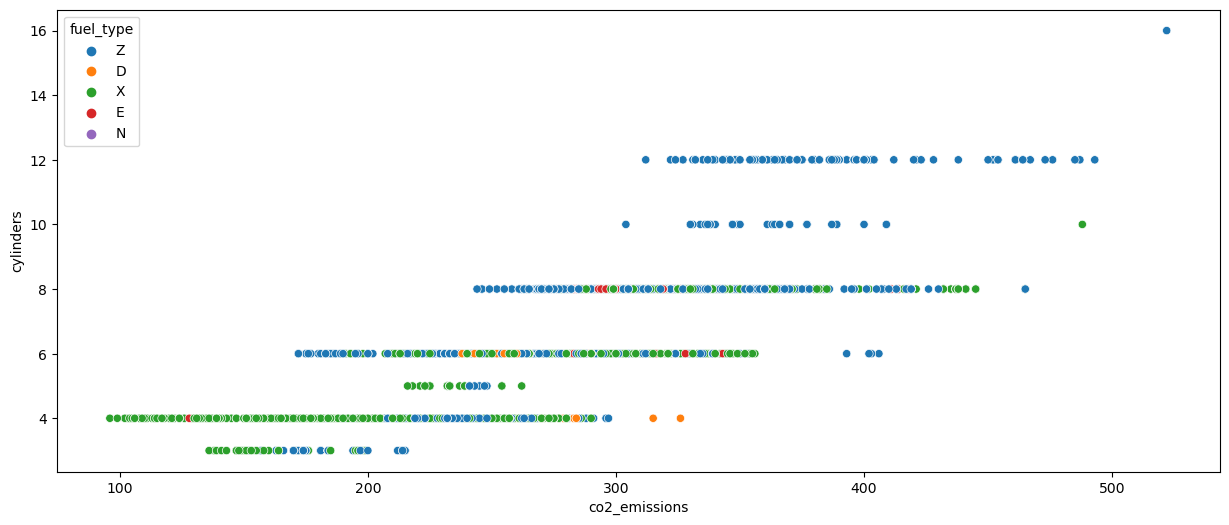

In [24]:
plt.subplots(figsize=(15, 6))
sb.scatterplot(x=data['co2_emissions'],y=data['cylinders'],data=data,hue='fuel_type')

In [25]:
data[data['cylinders']>=12] 

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,15.6,18,359
14,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12,A,Z,15.6,18,359
19,ASTON MARTIN,VANQUISH,MINICOMPACT,5.9,12,A,Z,15.6,18,359
36,AUDI,A8L,FULL-SIZE,6.3,12,AS,Z,15.5,18,363
70,BENTLEY,CONTINENTAL GT,SUBCOMPACT,6.0,12,AS,Z,15.5,18,356
...,...,...,...,...,...,...,...,...,...,...
5912,ROLLS-ROYCE,CULLINAN BLACK BADGE,STATION WAGON - MID-SIZE,6.7,12,AS,Z,16.5,17,386
5913,ROLLS-ROYCE,DAWN,COMPACT,6.6,12,AS,Z,17.1,17,400
5914,ROLLS-ROYCE,GHOST,FULL-SIZE,6.6,12,AS,Z,17.1,17,400
5915,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,AS,Z,17.1,17,400


In [25]:
cyl_4=data[data['cylinders']==4]

In [26]:
cyl_4['co2_emissions'].mean()

205.3168202764977

In [27]:
cyl_16=data[data['cylinders']==16]

In [28]:
cyl_16['co2_emissions'].mean()

522.0

In [26]:
data


,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
5976,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.4,30,219
5977,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,9.9,29,232
5978,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,10.3,27,240
5979,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,9.9,29,232


In [27]:
data_cat_features = data.select_dtypes(include='object')

data_cat_features1 = data_cat_features[['vehicle_class', 'transmission', 'fuel_type', 'model','make']]

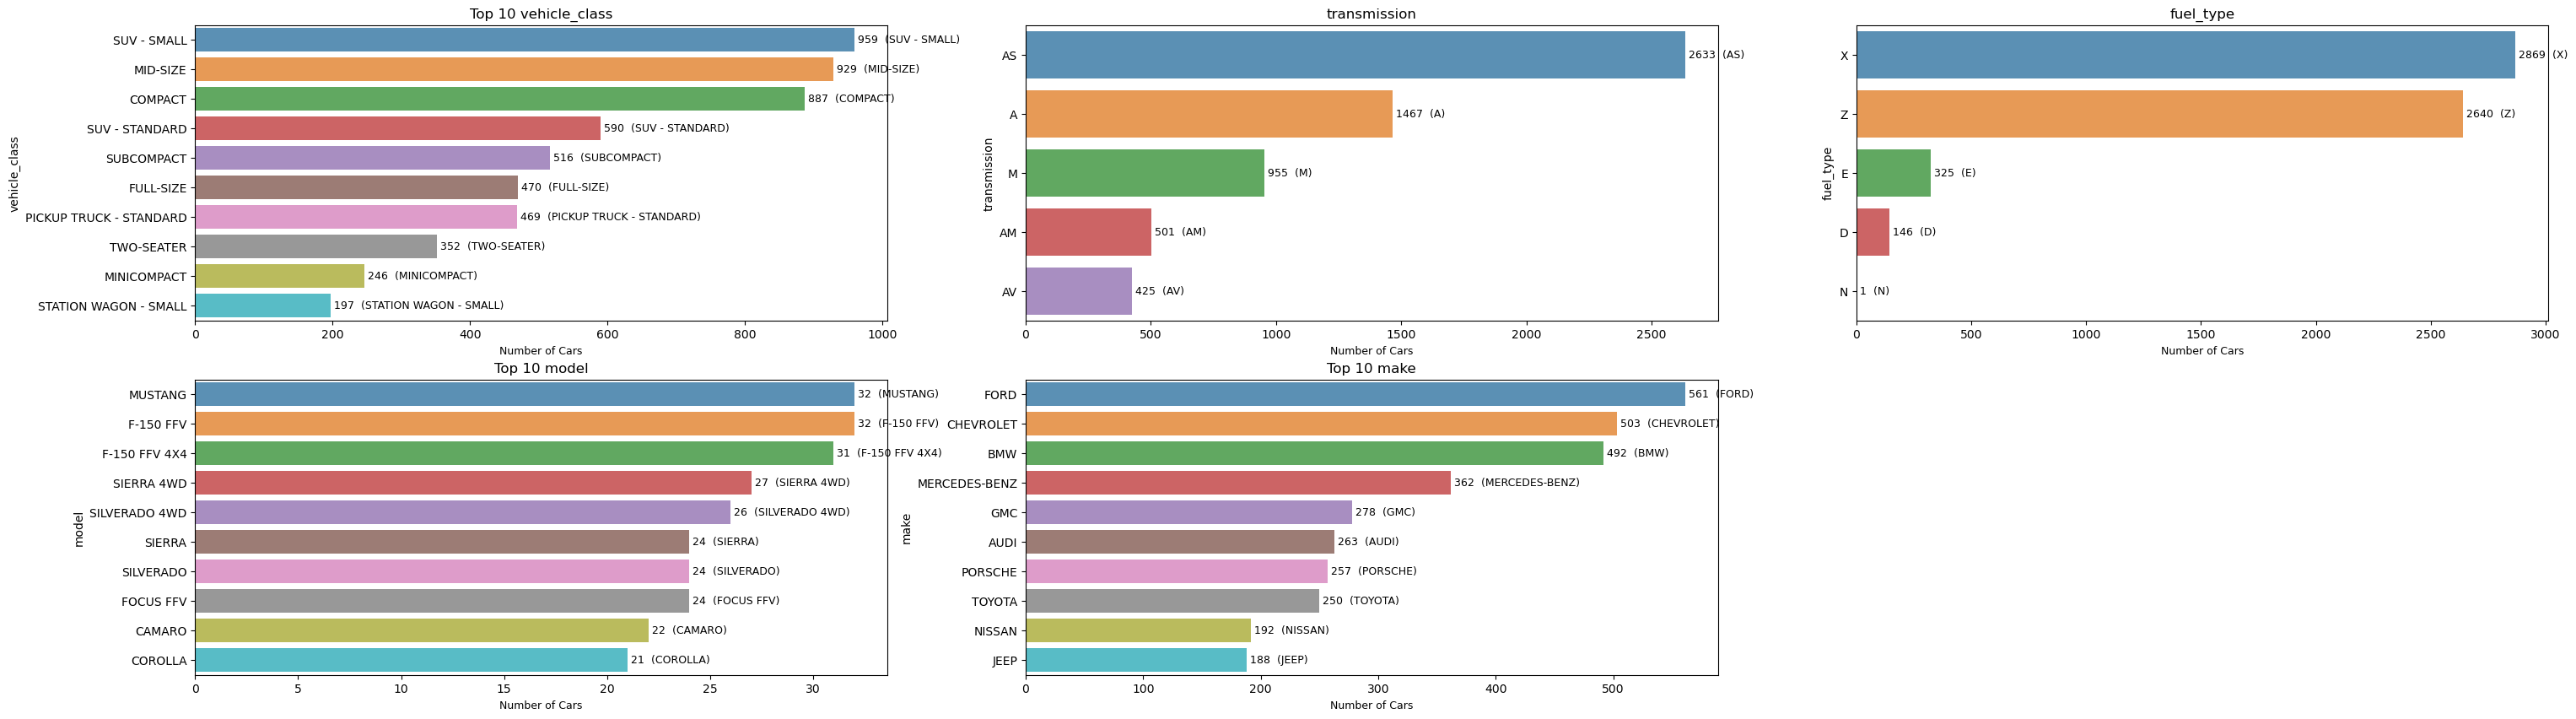

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(36, 10))

for variable, subplot in zip(data_cat_features1.columns, ax.flatten()):
    cat_count = data[variable].value_counts()
    cat_count10 = cat_count[:10]
    skew = data[variable].value_counts(normalize=True).skew()  # Calculate skewness
    z = sb.barplot(x=cat_count10.values, y=cat_count10.index, alpha=0.8, ax=subplot)
    
    if cat_count.size > 10:
        subplot.set_title('Top 10 {}'.format(variable))
    else:
        subplot.set_title(variable)
    
    z.set_xlabel('Number of Cars', fontsize=9)
    
    # Display the value counts as text on the plot
    for i, v in enumerate(cat_count10.values):
        subplot.text(v, i, f' {v}  ({cat_count10.index[i]})', color='black', va='center', fontsize=9)

# Remove the last subplot in the grid
fig.delaxes(ax[1][2])

plt.show()


In [29]:
make_co2 = data.groupby('make')['co2_emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = data.groupby('model')['co2_emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = data.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).head()

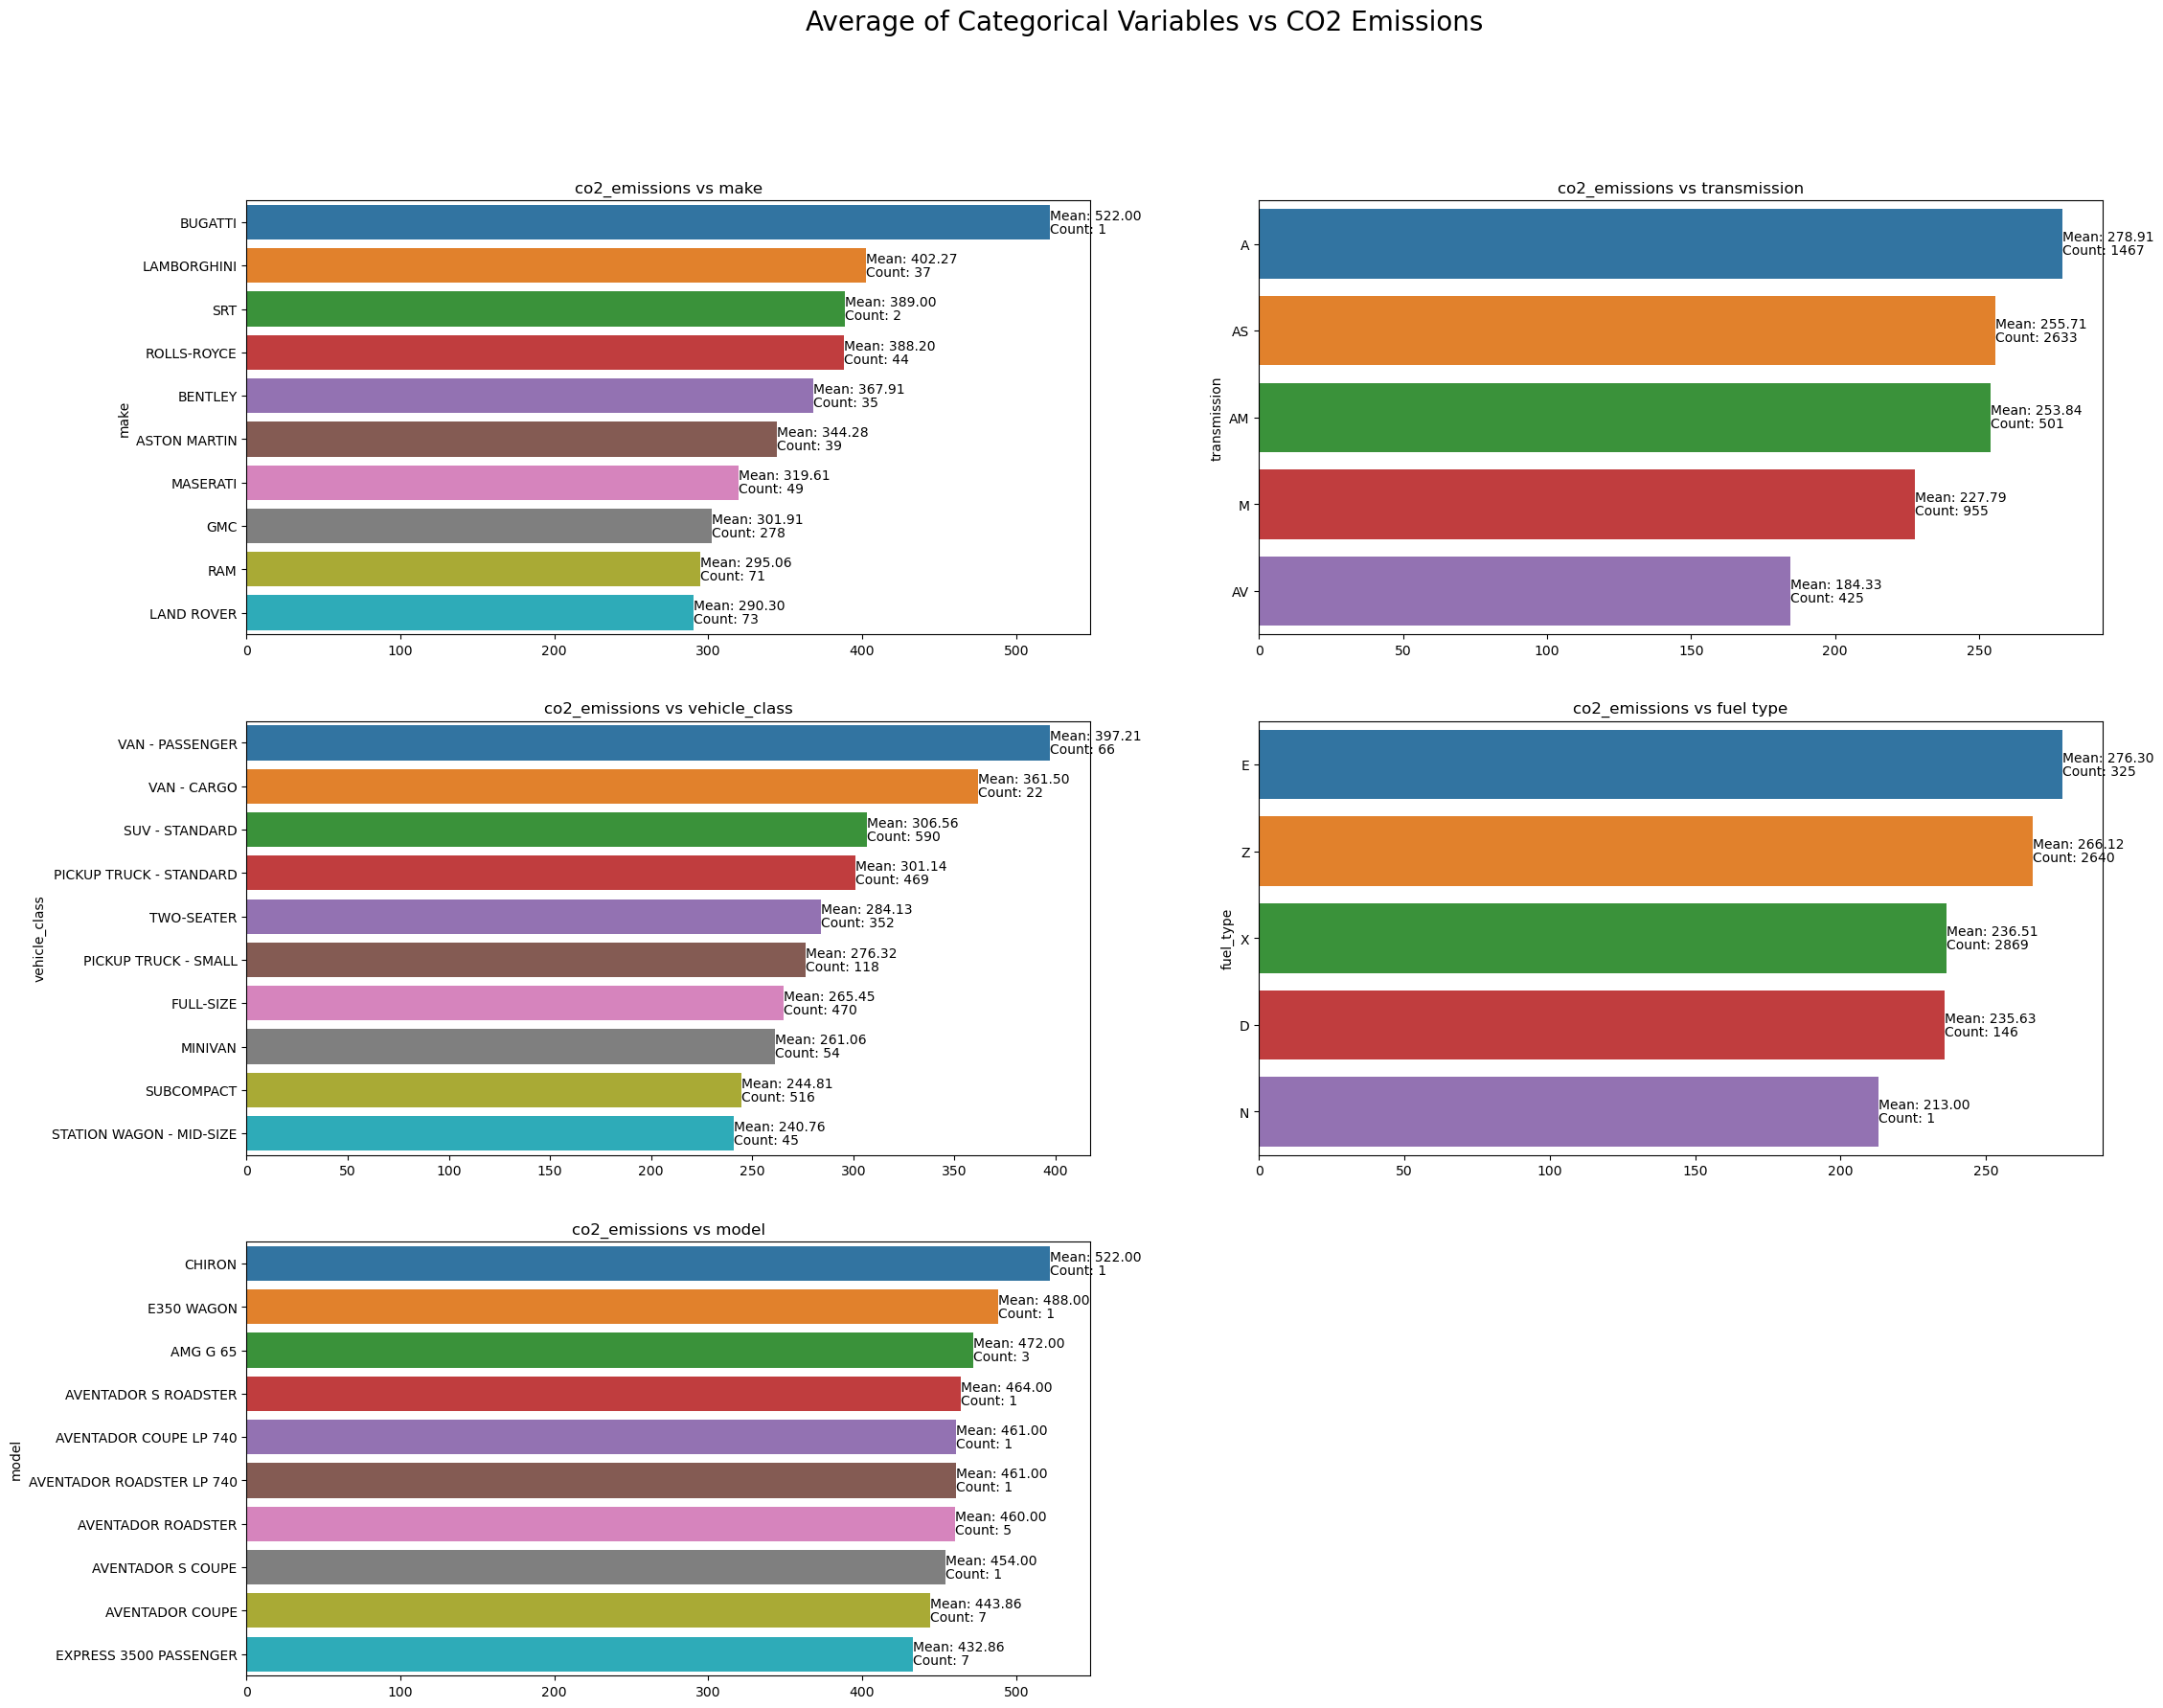

In [30]:

fig, axes = plt.subplots(3, 2, figsize=(25, 20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)


sb.barplot(ax=axes[0][0], x=make_co2.values, y=make_co2.index)
axes[0][0].set_title('co2_emissions vs make')
for i, val in enumerate(make_co2.index):
    mean_value = data[data['make'] == val]['co2_emissions'].mean()
    value_count = data['make'].value_counts()
    count_val = value_count[val]
    axes[0][0].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[0][0].text(mean_value, i, f'Count: {count_val}', va='top')

sb.barplot(ax=axes[0][1], x=transmission_co2.values, y=transmission_co2.index)
axes[0][1].set_title('co2_emissions vs transmission')
for i, val in enumerate(transmission_co2.index):
    mean_value = data[data['transmission'] == val]['co2_emissions'].mean()
    value_count = data['transmission'].value_counts()
    count_val = value_count[val]
    axes[0][1].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[0][1].text(mean_value, i, f'Count: {count_val}', va='top')

sb.barplot(ax=axes[1][0], x=vehicle_class_co2.values, y=vehicle_class_co2.index)
axes[1][0].set_title('co2_emissions vs vehicle_class')
for i, val in enumerate(vehicle_class_co2.index):
    mean_value = data[data['vehicle_class'] == val]['co2_emissions'].mean()
    value_count = data['vehicle_class'].value_counts()
    count_val = value_count[val]
    axes[1][0].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[1][0].text(mean_value, i, f'Count: {count_val}', va='top')


sb.barplot(ax=axes[1][1], x=fuel_type_co2.values, y=fuel_type_co2.index)
axes[1][1].set_title('co2_emissions vs fuel type')
for i, val in enumerate(fuel_type_co2.index):
    mean_value = data[data['fuel_type'] == val]['co2_emissions'].mean()
    value_count = data['fuel_type'].value_counts()
    count_val = value_count[val]
    axes[1][1].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[1][1].text(mean_value, i, f'Count: {count_val}', va='top')


sb.barplot(ax=axes[2][0], x=model_co2.values, y=model_co2.index)
axes[2][0].set_title('co2_emissions vs model')
for i, val in enumerate(model_co2.index):
    mean_value = data[data['model'] == val]['co2_emissions'].mean()
    value_count = data['model'].value_counts()
    count_val = value_count[val]
    axes[2][0].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[2][0].text(mean_value, i, f'Count: {count_val}', va='top')


fig.delaxes(axes[2][1])

plt.show()


In [31]:
#top_co2_emission_by_ford = data[(data['make'] == 'FORD') & (data['transmission'] == 'A') & (data['fuel_type'] == 'X')]
#top_co2_emission_by_ford

In [32]:
make_top10 = data[(data['make'] == 'FORD') | (data['make'] == 'BMW') | (data['make'] == 'CHEVROLET') | (data['make'] == 'MERCEDS-BENZ') | (data['make'] == 'GMC') | (data['make'] == 'AUDI') | (data['make'] == 'PORSCHE') | (data['make'] == 'TOYOTA') | (data['make'] == 'NISSAN') | (data['make'] == 'JEEP')]
make_top10

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
20,AUDI,A4,COMPACT,2.0,4,AV,Z,8.8,32,202
21,AUDI,A4 QUATTRO,COMPACT,2.0,4,AS,Z,10.0,28,230
22,AUDI,A4 QUATTRO,COMPACT,2.0,4,M,Z,9.3,30,214
23,AUDI,A5 CABRIOLET QUATTRO,SUBCOMPACT,2.0,4,AS,Z,10.0,28,230
24,AUDI,A5 QUATTRO,SUBCOMPACT,2.0,4,AS,Z,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...
5955,TOYOTA,SIENNA,MINIVAN,3.5,6,AS,X,11.0,26,259
5956,TOYOTA,TACOMA 4WD D-CAB TRD OFF-ROAD/PRO,PICKUP TRUCK - SMALL,3.5,6,M,X,12.9,22,300
5957,TOYOTA,TUNDRA 4WD,PICKUP TRUCK - STANDARD,5.7,8,AS,X,16.3,17,381
5958,TOYOTA,YARIS,COMPACT,1.5,4,AS,X,6.6,43,155


In [33]:
data['vehicle_class'].value_counts().head(10)

vehicle_class
SUV - SMALL                959
MID-SIZE                   929
COMPACT                    887
SUV - STANDARD             590
SUBCOMPACT                 516
FULL-SIZE                  470
PICKUP TRUCK - STANDARD    469
TWO-SEATER                 352
MINICOMPACT                246
STATION WAGON - SMALL      197
Name: count, dtype: int64

In [34]:
model_top10 = data[(data['model'] == 'F-150 FFV') |(data['model'] == 'MUSTANG') |(data['model'] == 'F-150 FFV 4X4') |(data['model'] == 'SIERRA 4WD') |(data['model'] == 'SILVERADO 4WD') |(data['model'] == 'SIERRA') |(data['model'] == 'SILVERADO') |(data['model'] == 'FOCUS FFV') |(data['model'] == 'CAMARO') |(data['model'] == 'COROLLA')]
model_top10

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
188,CHEVROLET,CAMARO,COMPACT,3.6,6,AS,X,11.2,25,258
189,CHEVROLET,CAMARO,COMPACT,3.6,6,M,X,11.7,24,269
237,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,4.3,6,A,X,11.8,24,271
238,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,4.3,6,A,E,16.8,17,269
239,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,5.3,8,A,X,12.7,22,292
...,...,...,...,...,...,...,...,...,...,...
5735,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,5.3,8,A,X,12.7,22,298
5936,TOYOTA,COROLLA,COMPACT,1.8,4,AV,X,7.1,40,165
5938,TOYOTA,COROLLA,COMPACT,1.8,4,M,X,7.1,40,165
5939,TOYOTA,COROLLA,COMPACT,2.0,4,AV,X,6.7,42,158


In [35]:
vehicle_classes_to_filter = [
    'SUV - SMALL',
    'MID-SIZE',
    'COMPACT',
    'SUV - STANDARD',
    'SUBCOMPACT',
    'FULL-SIZE',
    'PICKUP TRUCK - STANDARD',
    'TWO-SEATER',
    'MINICOMPACT',
    'STATION WAGON - SMALL'
]

top10_vechicle_class = data[data['vehicle_class'].isin(vehicle_classes_to_filter)]


In [36]:
make_co2 = make_top10 .groupby('make')['co2_emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = model_top10.groupby('model')['co2_emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = top10_vechicle_class.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).head()

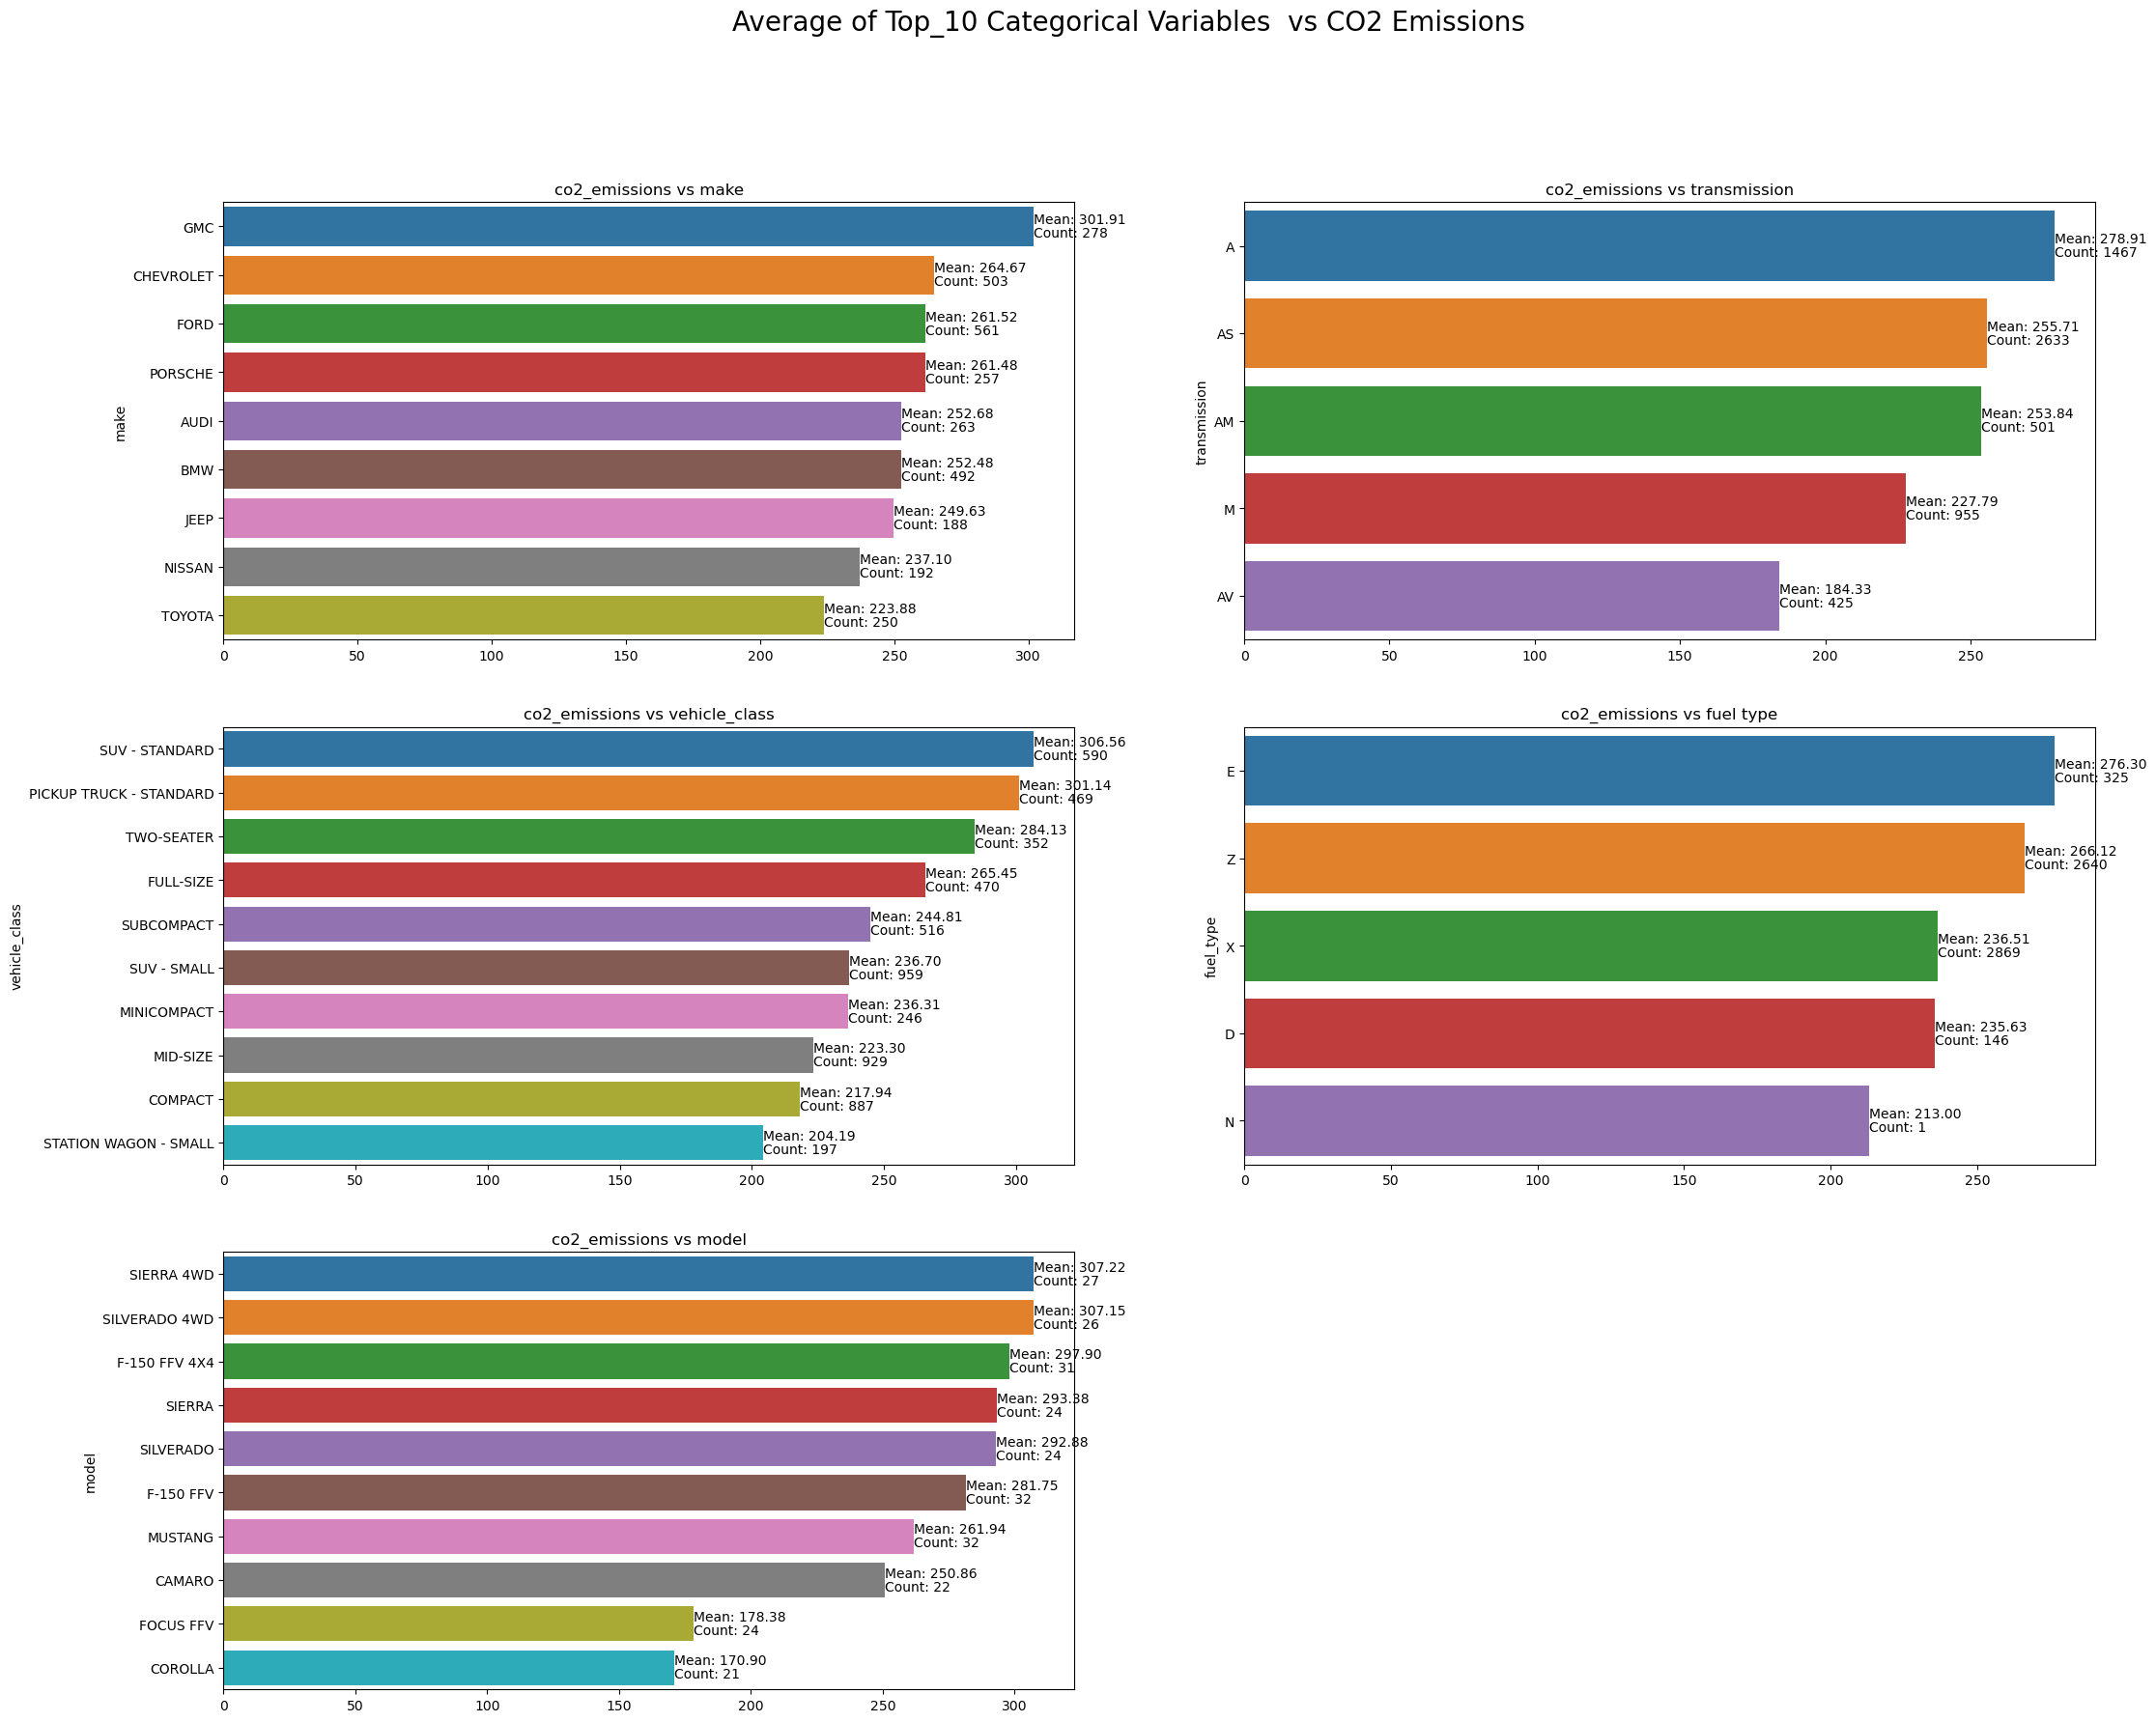

In [37]:

fig, axes = plt.subplots(3, 2, figsize=(25, 20))
fig.suptitle('Average of Top_10 Categorical Variables  vs CO2 Emissions', size=20)


sb.barplot(ax=axes[0][0], x=make_co2.values, y=make_co2.index)
axes[0][0].set_title('co2_emissions vs make')
for i, val in enumerate(make_co2.index):
    mean_value = data[data['make'] == val]['co2_emissions'].mean()
    value_count = data['make'].value_counts()
    count_val = value_count[val]
    axes[0][0].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[0][0].text(mean_value, i, f'Count: {count_val}', va='top')

sb.barplot(ax=axes[0][1], x=transmission_co2.values, y=transmission_co2.index)
axes[0][1].set_title('co2_emissions vs transmission')
for i, val in enumerate(transmission_co2.index):
    mean_value = data[data['transmission'] == val]['co2_emissions'].mean()
    value_count = data['transmission'].value_counts()
    count_val = value_count[val]
    axes[0][1].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[0][1].text(mean_value, i, f'Count: {count_val}', va='top')

sb.barplot(ax=axes[1][0], x=vehicle_class_co2.values, y=vehicle_class_co2.index)
axes[1][0].set_title('co2_emissions vs vehicle_class')
for i, val in enumerate(vehicle_class_co2.index):
    mean_value = data[data['vehicle_class'] == val]['co2_emissions'].mean()
    value_count = data['vehicle_class'].value_counts()
    count_val = value_count[val]
    axes[1][0].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[1][0].text(mean_value, i, f'Count: {count_val}', va='top')


sb.barplot(ax=axes[1][1], x=fuel_type_co2.values, y=fuel_type_co2.index)
axes[1][1].set_title('co2_emissions vs fuel type')
for i, val in enumerate(fuel_type_co2.index):
    mean_value = data[data['fuel_type'] == val]['co2_emissions'].mean()
    value_count = data['fuel_type'].value_counts()
    count_val = value_count[val]
    axes[1][1].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[1][1].text(mean_value, i, f'Count: {count_val}', va='top')


sb.barplot(ax=axes[2][0], x=model_co2.values, y=model_co2.index)
axes[2][0].set_title('co2_emissions vs model')
for i, val in enumerate(model_co2.index):
    mean_value = data[data['model'] == val]['co2_emissions'].mean()
    value_count = data['model'].value_counts()
    count_val = value_count[val]
    axes[2][0].text(mean_value, i, f'Mean: {mean_value:.2f}', va='bottom')
    axes[2][0].text(mean_value, i, f'Count: {count_val}', va='top')


fig.delaxes(axes[2][1])

plt.show()


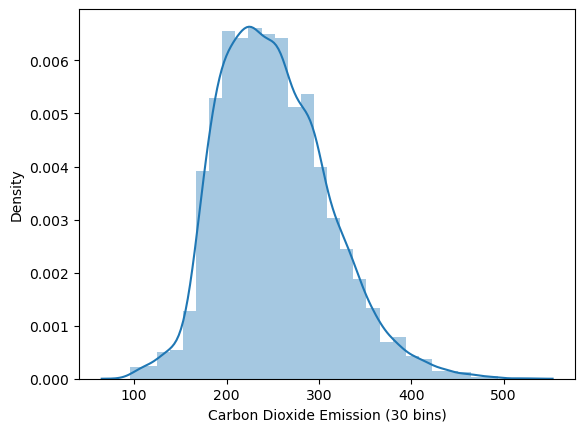

In [38]:
sb.distplot(data['co2_emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')
plt.show()

In [39]:
mean = data['co2_emissions'].mean()
mode = data['co2_emissions'].mode()
median = data['co2_emissions'].median()


print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 251.7154322019729
Median for CO2 Emission is 246.0
Mode for CO2 Emission is 0    221
1    294
Name: co2_emissions, dtype: int64


In [40]:
Q1 = data['co2_emissions'].quantile(0.25)
Q3 = data['co2_emissions'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier = data[(data['co2_emissions'] < lower_bound) | (data['co2_emissions'] > upper_bound)]
outliers= len(outlier)
outliers

65

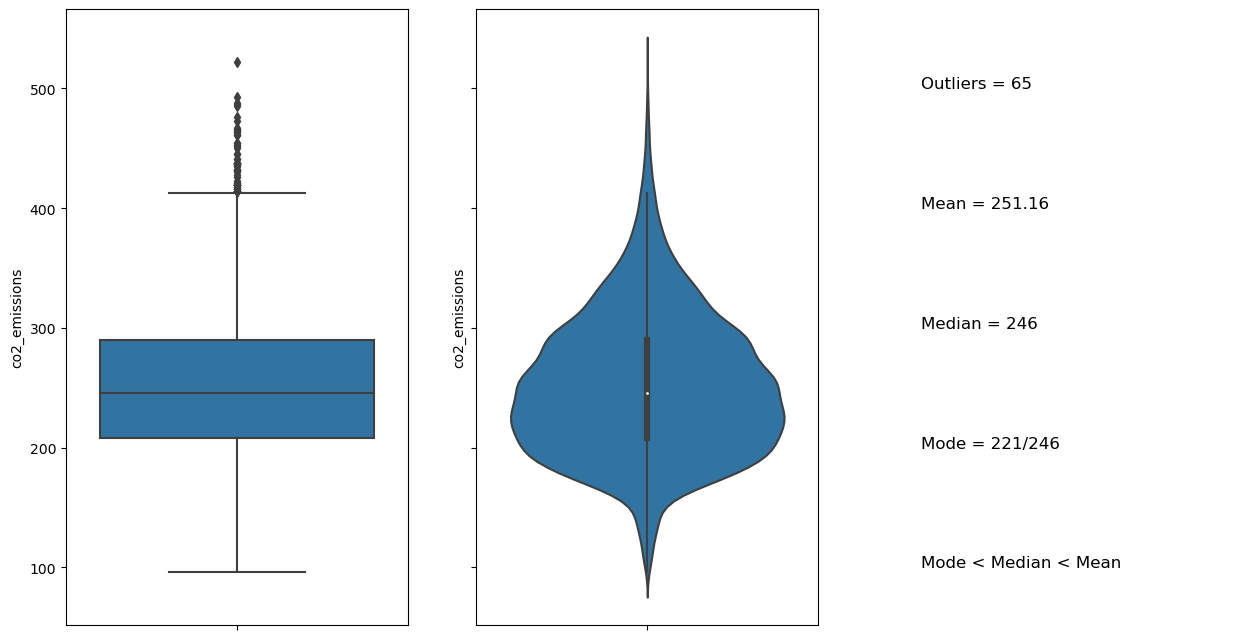

In [41]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))
sb.boxplot(y=data['co2_emissions'],orient="v",ax=axes[0])
sb.violinplot(y=data['co2_emissions'], orient="v", ax = axes[1]);
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 500, "Outliers = 65", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)
plt.axis("off")
plt.show()

In [42]:
O_encoding=OrdinalEncoder()

In [43]:
data['transmission']=O_encoding.fit_transform(data[['transmission']])
data['fuel_type']=O_encoding.fit_transform(data[['fuel_type']])
data['vehicle_class']=O_encoding.fit_transform(data[['vehicle_class']])
data['make']=O_encoding.fit_transform(data[['make']])
data['model']=O_encoding.fit_transform(data[['model']])

In [44]:
data.corr()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
make,1.000000,0.026574,-0.022655,-0.145250,-0.164537,0.171237,0.037859,-0.177151,0.190379,-0.152802
model,0.026574,1.000000,0.218445,0.080717,0.057755,-0.015061,-0.081130,0.140015,-0.117855,0.119023
vehicle_class,-0.022655,0.218445,1.000000,0.164435,0.127075,-0.167901,-0.044198,0.295641,-0.294666,0.306202
engine_size,-0.145250,0.080717,0.164435,1.000000,0.928959,-0.332241,0.049932,0.819090,-0.768063,0.854631
cylinders,-0.164537,0.057755,0.127075,0.928959,1.000000,-0.290514,0.119215,0.779690,-0.729066,0.835089
transmission,0.171237,-0.015061,-0.167901,-0.332241,-0.290514,1.000000,0.176171,-0.359556,0.355507,-0.332365
fuel_type,0.037859,-0.081130,-0.044198,0.049932,0.119215,0.176171,1.000000,-0.114884,-0.001658,0.091346
fuel_consumpution,-0.177151,0.140015,0.295641,0.819090,0.779690,-0.359556,-0.114884,1.000000,-0.927750,0.914298
fuel_consumption_mpg,0.190379,-0.117855,-0.294666,-0.768063,-0.729066,0.355507,-0.001658,-0.927750,1.000000,-0.907149
co2_emissions,-0.152802,0.119023,0.306202,0.854631,0.835089,-0.332365,0.091346,0.914298,-0.907149,1.000000


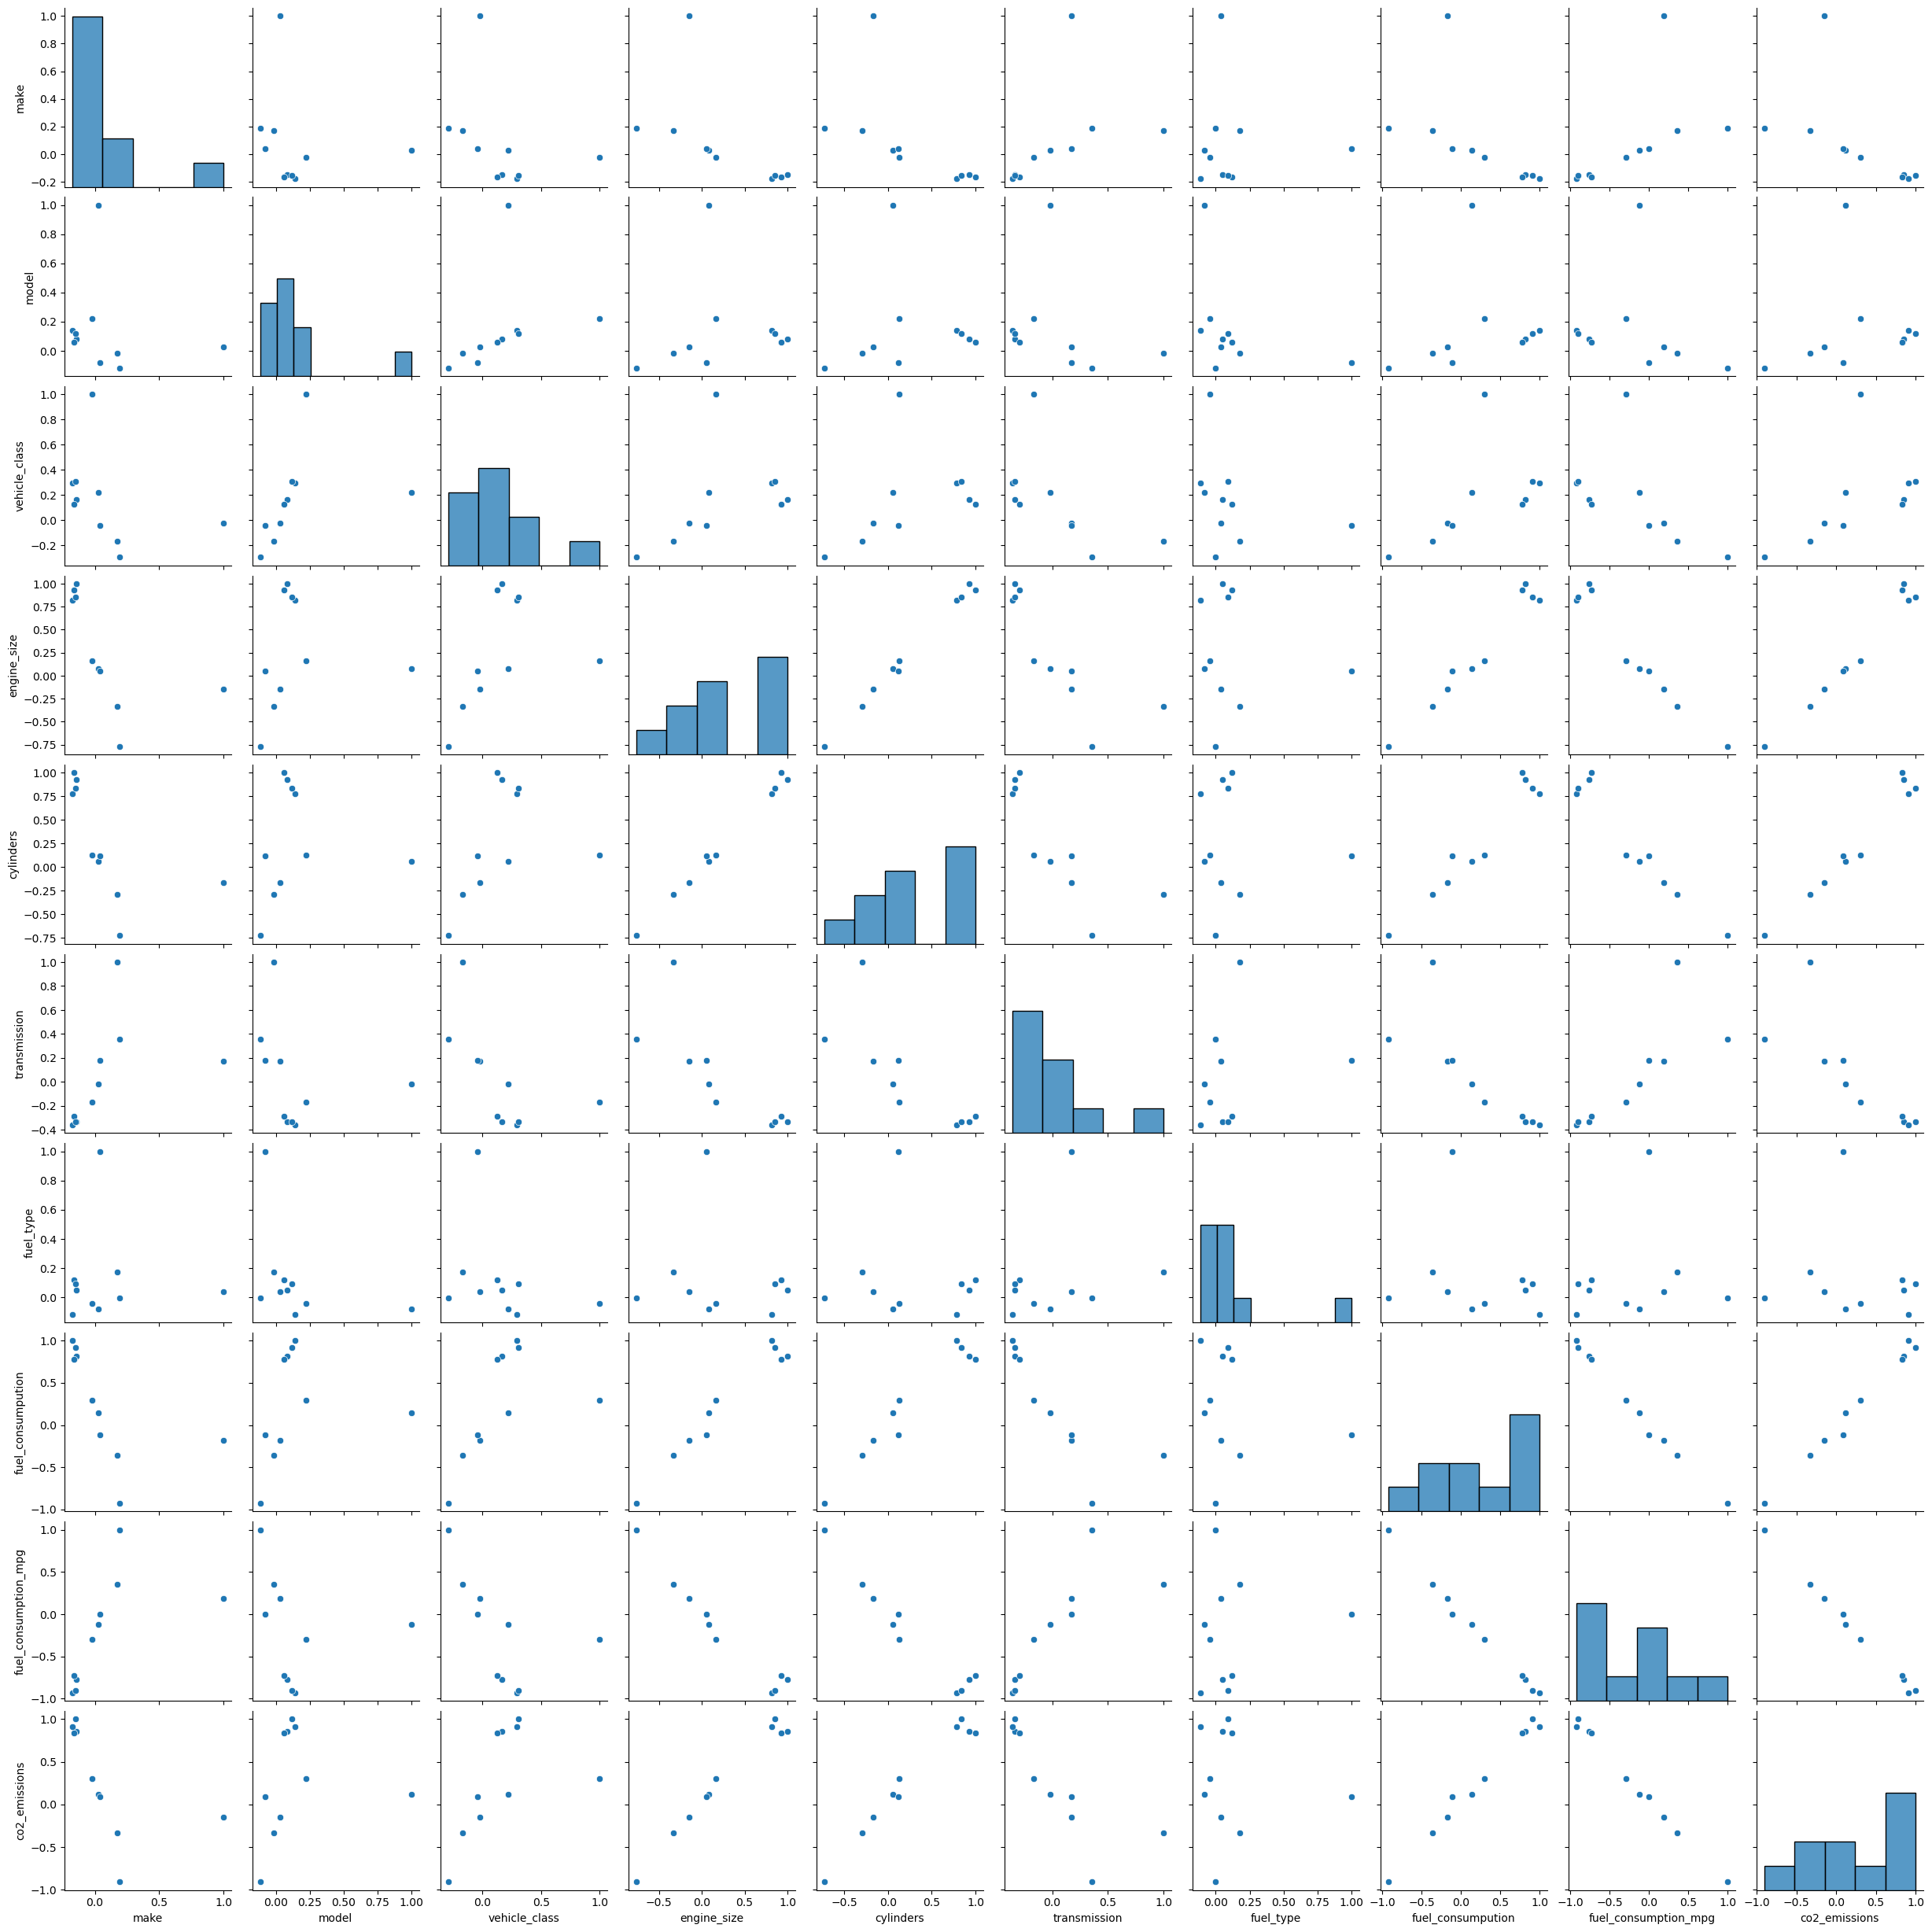

In [45]:
sb.pairplot(data.corr())

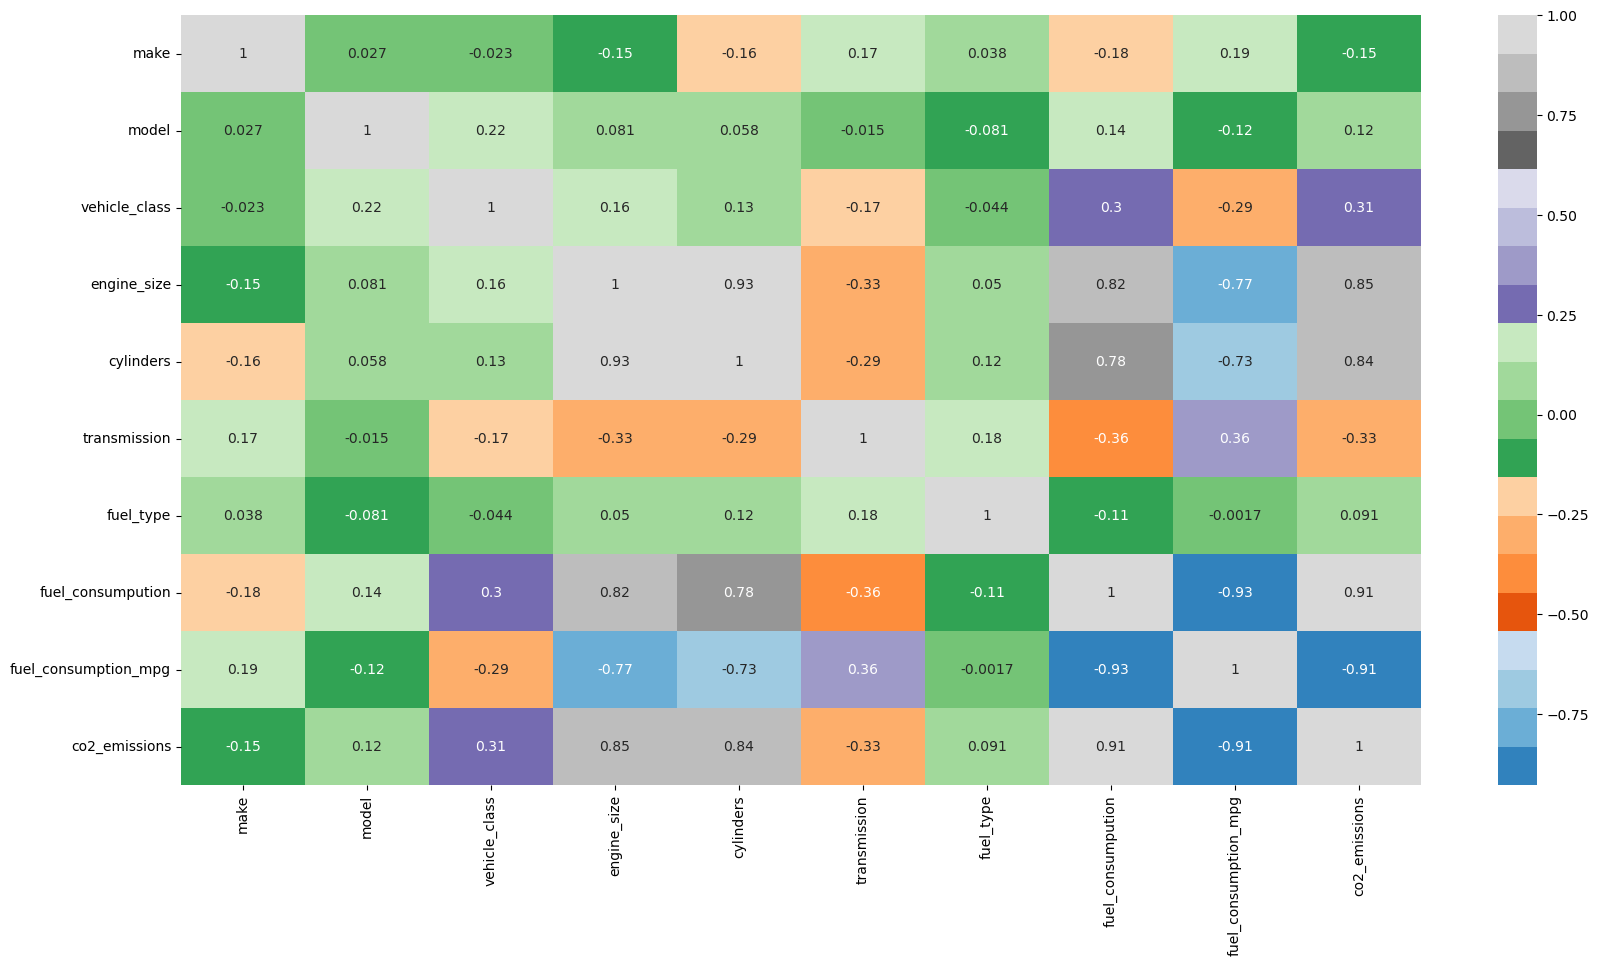

In [46]:
plt.figure(figsize=(20,10))

corr =  data.corr()

corr =data.corr(method='pearson')
sb.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

In [47]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [48]:
data_norm=norm_fun(data.iloc[:,:])
data_norm

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,0.0,0.509718,0.000000,0.146667,0.076923,0.50,1.0,0.200000,0.379310,0.234742
1,0.0,0.509718,0.000000,0.200000,0.076923,1.00,1.0,0.250000,0.310345,0.293427
2,0.0,0.510345,0.000000,0.080000,0.076923,0.75,1.0,0.081818,0.637931,0.093897
3,0.0,0.604389,0.733333,0.346667,0.230769,0.50,1.0,0.318182,0.241379,0.373239
4,0.0,0.734796,0.733333,0.346667,0.230769,0.50,1.0,0.295455,0.275862,0.347418
...,...,...,...,...,...,...,...,...,...,...
5976,1.0,0.947335,0.733333,0.146667,0.076923,0.50,1.0,0.240909,0.327586,0.288732
5977,1.0,0.951097,0.733333,0.146667,0.076923,0.50,1.0,0.263636,0.310345,0.319249
5978,1.0,0.952978,0.733333,0.146667,0.076923,0.50,1.0,0.281818,0.275862,0.338028
5979,1.0,0.957994,0.800000,0.146667,0.076923,0.50,1.0,0.263636,0.310345,0.319249


In [49]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

In [50]:
pca=PCA()
new_inputs=pca.fit_transform(data_norm)
new_inputs

array([[-2.98599381e-01, -3.73514179e-01, -3.03004297e-01, ...,
        -2.03253673e-02,  3.54608109e-03,  1.49690273e-02],
       [-5.47849809e-01, -1.60254301e-01, -6.07401549e-01, ...,
        -5.56316770e-02, -5.36583170e-03,  9.62244160e-04],
       [-5.91429114e-01, -2.45139720e-01, -3.59376040e-01, ...,
         2.56792779e-02, -1.48639994e-02,  9.78501932e-02],
       ...,
       [-1.34251680e-02,  6.58507118e-01,  3.35563510e-01, ...,
        -7.46678386e-04,  1.13135285e-02, -5.56108680e-03],
       [ 3.18710140e-03,  7.05870815e-01,  3.42489625e-01, ...,
         2.15234304e-04,  8.90885317e-03,  3.50504348e-03],
       [ 3.27131841e-02,  7.03450042e-01,  3.26198001e-01, ...,
         1.04841798e-03,  9.34145409e-03, -4.29419878e-03]])

In [51]:
np.round(pca.explained_variance_ratio_,2)

array([0.31, 0.19, 0.14, 0.13, 0.13, 0.08, 0.01, 0.  , 0.  , 0.  ])

In [52]:
nc=range(1,11)
l=[]
for i in nc:
    model_k=KMeans(n_clusters=i)
    model_k.fit_predict(new_inputs)
    l.append(model_k.inertia_)

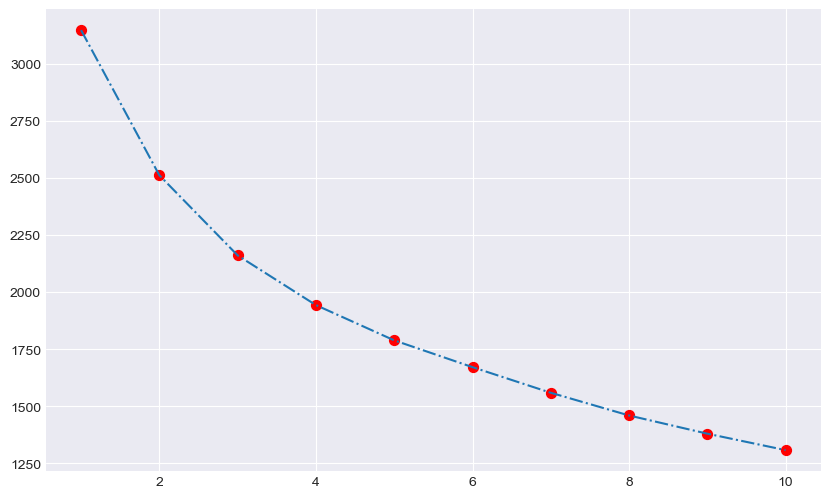

In [53]:
plt.figure(figsize=(10,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=50,color="red")
plt.plot(nc,l,linestyle="-.")

In [54]:
model_k=KMeans(n_clusters=4)
pred=model_k.fit_predict(data_norm)
pred

array([3, 1, 1, ..., 0, 0, 0])

In [55]:
data_p=pd.DataFrame(data.iloc[:,:-1])
data_p['Cluster_id']=pred
data_p

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,Cluster_id
0,0.0,813.0,0.0,2.0,4,2.0,4.0,8.5,33,3
1,0.0,813.0,0.0,2.4,4,4.0,4.0,9.6,29,1
2,0.0,814.0,0.0,1.5,4,3.0,4.0,5.9,48,1
3,0.0,964.0,11.0,3.5,6,2.0,4.0,11.1,25,0
4,0.0,1172.0,11.0,3.5,6,2.0,4.0,10.6,27,0
...,...,...,...,...,...,...,...,...,...,...
5976,41.0,1511.0,11.0,2.0,4,2.0,4.0,9.4,30,0
5977,41.0,1517.0,11.0,2.0,4,2.0,4.0,9.9,29,0
5978,41.0,1520.0,11.0,2.0,4,2.0,4.0,10.3,27,0
5979,41.0,1528.0,12.0,2.0,4,2.0,4.0,9.9,29,0


In [56]:
data_p['Cluster_id'].value_counts()

Cluster_id
0    1734
3    1556
2    1464
1    1227
Name: count, dtype: int64

In [57]:
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,0.0,813.0,0.0,2.0,4,2.0,4.0,8.5,33,196
1,0.0,813.0,0.0,2.4,4,4.0,4.0,9.6,29,221
2,0.0,814.0,0.0,1.5,4,3.0,4.0,5.9,48,136
3,0.0,964.0,11.0,3.5,6,2.0,4.0,11.1,25,255
4,0.0,1172.0,11.0,3.5,6,2.0,4.0,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
5976,41.0,1511.0,11.0,2.0,4,2.0,4.0,9.4,30,219
5977,41.0,1517.0,11.0,2.0,4,2.0,4.0,9.9,29,232
5978,41.0,1520.0,11.0,2.0,4,2.0,4.0,10.3,27,240
5979,41.0,1528.0,12.0,2.0,4,2.0,4.0,9.9,29,232


<Axes: xlabel='Cluster_id'>

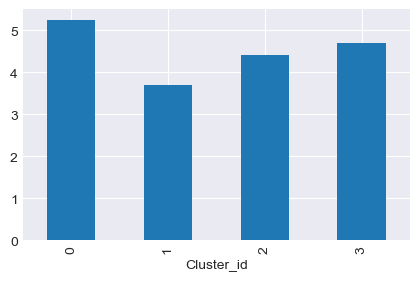

In [58]:
plt.subplots(figsize=(5, 3))
pd.crosstab(data["co2_emissions"],data_p['Cluster_id']).mean().plot(kind='bar')


In [59]:
data_p['Cluster_id'].value_counts()

Cluster_id
0    1734
3    1556
2    1464
1    1227
Name: count, dtype: int64

In [60]:
co2['make'].describe()

count     5981
unique      42
top       FORD
freq       561
Name: make, dtype: object

In [61]:
co2['Cluster_id']=data_p['Cluster_id']

In [62]:
co2

,index,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumpution,fuel_consumption_mpg,co2_emissions,Cluster_id
0,0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,3
1,1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,1
2,2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,1
3,3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,0
4,4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219,0
5977,7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232,0
5978,7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240,0
5979,7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232,0


In [63]:
data_cluster_0=co2[co2['Cluster_id']==0]

In [64]:
data_cluster_1=co2[co2['Cluster_id']==1]

In [65]:
data_cluster_2=co2[co2['Cluster_id']==2]

In [66]:
data_cluster_3=co2[co2['Cluster_id']==3]

In [67]:
data_cluster_0['make'].describe()

count     1734
unique      35
top       FORD
freq       200
Name: make, dtype: object

<Axes: xlabel='make'>

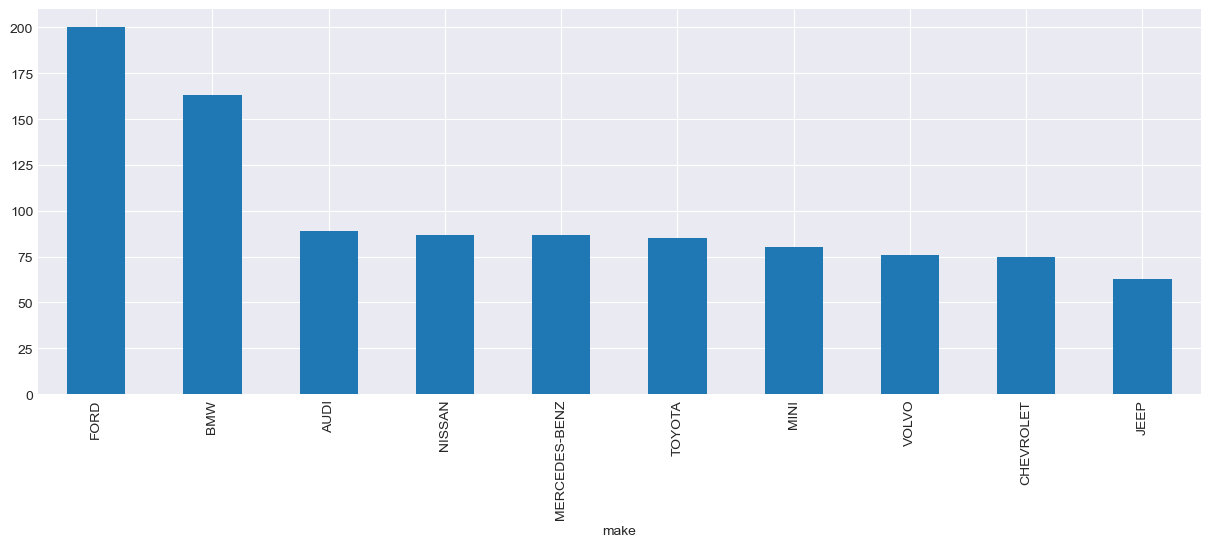

In [68]:
plt.subplots(figsize=(15, 5))
data_cluster_0['make'].value_counts().head(10).plot(kind='bar')

In [69]:
data_cluster_1['make'].describe()

count       1227
unique        29
top       TOYOTA
freq         131
Name: make, dtype: object

<Axes: xlabel='make'>

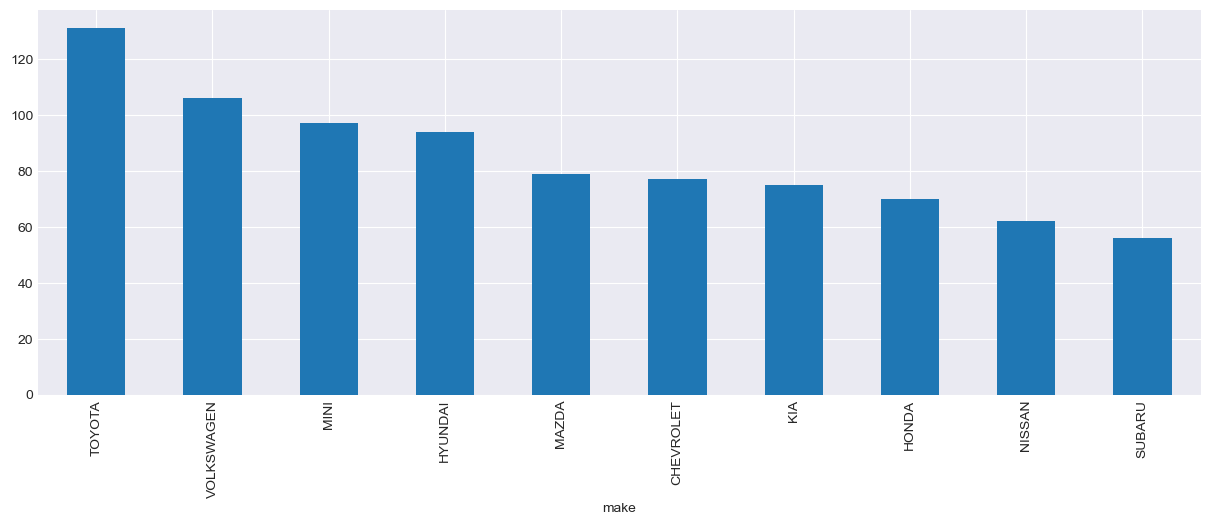

In [70]:
plt.subplots(figsize=(15, 5))
data_cluster_1['make'].value_counts().head(10).plot(kind='bar')

In [71]:
data_cluster_2['make'].describe()

count          1464
unique           35
top       CHEVROLET
freq            271
Name: make, dtype: object

<Axes: xlabel='make'>

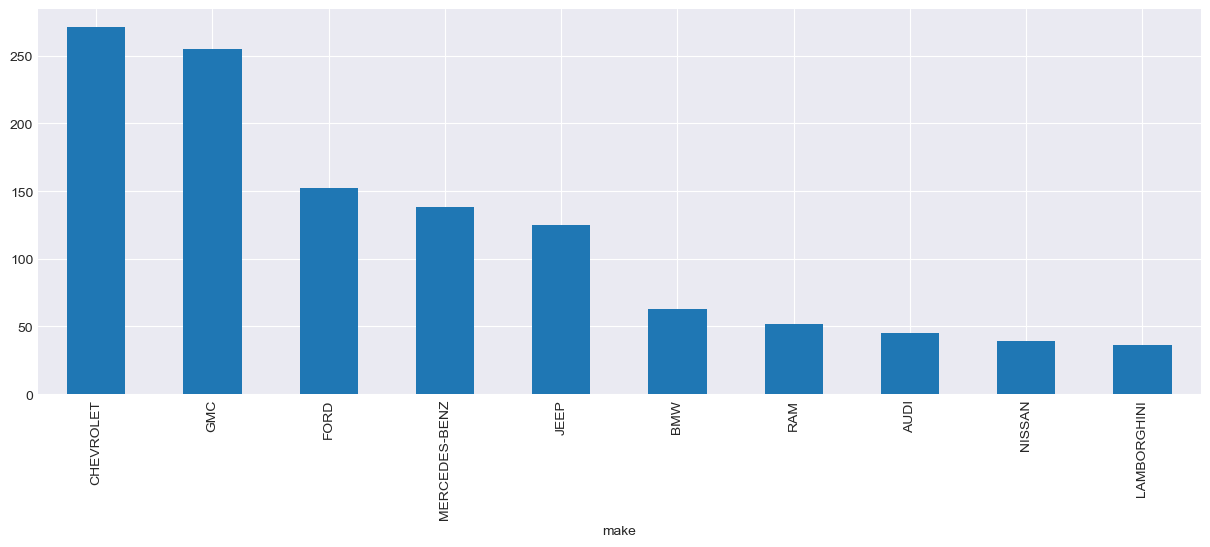

In [72]:
plt.subplots(figsize=(15, 5))
data_cluster_2['make'].value_counts().head(10).plot(kind='bar')

In [73]:
data_cluster_3['make'].describe()

count     1556
unique      33
top        BMW
freq       218
Name: make, dtype: object

<Axes: xlabel='make'>

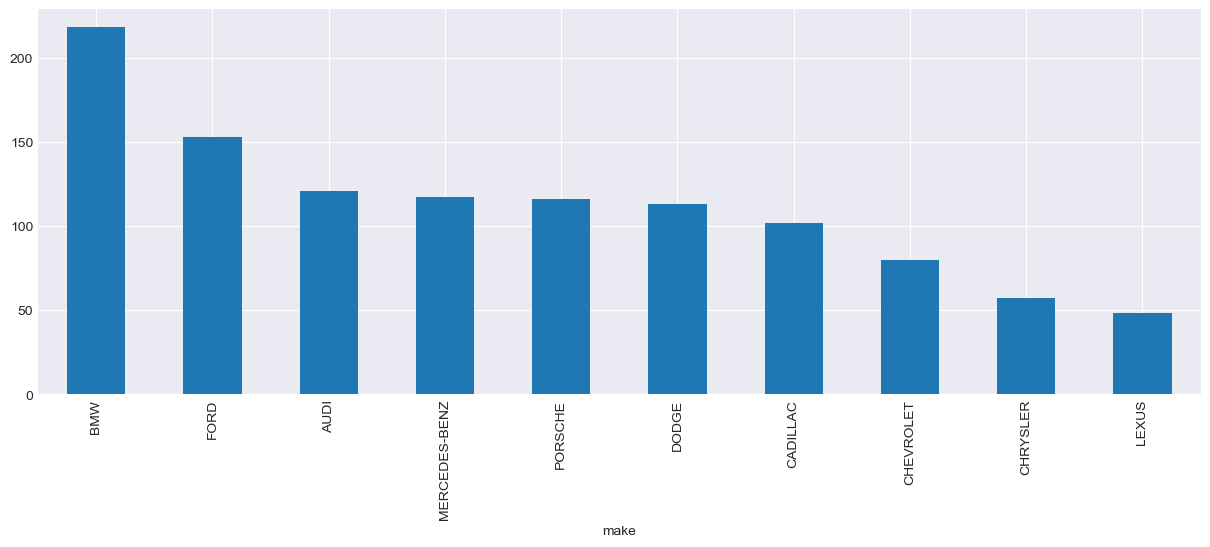

In [74]:
plt.subplots(figsize=(15, 5))
data_cluster_3['make'].value_counts().head(10).plot(kind='bar')

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [76]:
inputs=data.iloc[:,:-1]
target=data.iloc[:,-1]

In [77]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.25,random_state=150)

In [78]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [79]:
rf_regressor = RandomForestRegressor()  
rf_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [80]:
bagging_regressor=BaggingRegressor()
bagging_regressor.fit(x_train, y_train)

BaggingRegressor()

In [81]:
boosting_regressor=AdaBoostRegressor()
boosting_regressor.fit(x_train, y_train)

AdaBoostRegressor()

In [82]:
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumpution,fuel_consumption_mpg,co2_emissions
0,0.0,813.0,0.0,2.0,4,2.0,4.0,8.5,33,196
1,0.0,813.0,0.0,2.4,4,4.0,4.0,9.6,29,221
2,0.0,814.0,0.0,1.5,4,3.0,4.0,5.9,48,136
3,0.0,964.0,11.0,3.5,6,2.0,4.0,11.1,25,255
4,0.0,1172.0,11.0,3.5,6,2.0,4.0,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
5976,41.0,1511.0,11.0,2.0,4,2.0,4.0,9.4,30,219
5977,41.0,1517.0,11.0,2.0,4,2.0,4.0,9.9,29,232
5978,41.0,1520.0,11.0,2.0,4,2.0,4.0,10.3,27,240
5979,41.0,1528.0,12.0,2.0,4,2.0,4.0,9.9,29,232


In [83]:
def evaluate_model(model, inputs, target):
    mse_scores = -cross_val_score(model, inputs, target, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model,inputs, target, cv=5, scoring="r2")
    bagging_scores=cross_val_score(model,inputs,target,cv=5)
    boosting_scores=cross_val_score(model,inputs,target,cv=5)
    return {
        "MSE": mse_scores.mean(),
        "RMSE": rmse_scores.mean(),
        "R-squared": r2_scores.mean(),
        "bagging_score":bagging_scores.mean(),
        "boosting_score":boosting_scores.mean()
    }
dt_scores = evaluate_model(dt_regressor, x_train, y_train)
rf_scores = evaluate_model(rf_regressor, x_train, y_train)
print("DecisionTreeRegressor Scores:")
print(dt_scores)
print("  ")
print("RandomForestRegressor Scores:")
print(rf_scores)
print("  ")
best_model = "DecisionTreeRegressor" if dt_scores["MSE"] < rf_scores["MSE"] else "RandomForestRegressor"

print(f"The Best Model is {best_model}")

DecisionTreeRegressor Scores:
{'MSE': 23.78750309674223, 'RMSE': 4.824733561287476, 'R-squared': 0.9935793456668535, 'bagging_score': 0.9935086519175437, 'boosting_score': 0.9932374564555154}
  
RandomForestRegressor Scores:
{'MSE': 15.352354727206409, 'RMSE': 3.832324614877957, 'R-squared': 0.9957055468478424, 'bagging_score': 0.995885306537712, 'boosting_score': 0.9957676592429227}
  
The Best Model is RandomForestRegressor


In [84]:
y_pred=rf_regressor.predict(x_test)

In [85]:
output_data=pd.DataFrame({'Predicted Values': y_pred, 'Actual Values': y_test})
output_data.head(10)

,Predicted Values,Actual Values
3924,241.400000,241
2452,262.725500,265
5122,193.183222,193
3177,237.727500,238
1027,201.540000,200
1336,196.800000,196
586,267.350000,267
861,163.012762,161
3575,205.617143,204
4217,296.550321,311


In [86]:
z_pred=dt_regressor.predict(x_test)

In [87]:
output_data1=pd.DataFrame({'Predicted Values': z_pred, 'Actual Values': y_test})
output_data1.head(10)

,Predicted Values,Actual Values
3924,242.000000,241
2452,263.000000,265
5122,194.000000,193
3177,238.000000,238
1027,200.000000,200
1336,196.000000,196
586,270.000000,267
861,161.000000,161
3575,206.000000,204
4217,296.333333,311


In [88]:
x_pred=boosting_regressor.predict(x_test)

In [89]:
output_data1=pd.DataFrame({'Predicted Values': x_pred, 'Actual Values': y_test})
output_data1.head(10)

,Predicted Values,Actual Values
3924,245.174000,241
2452,249.452439,265
5122,207.605927,193
3177,249.452439,238
1027,204.498328,200
1336,206.012792,196
586,245.138670,267
861,195.281410,161
3575,204.498328,204
4217,284.107411,311


In [90]:
MLR_model=smf.ols('co2_emissions~make+model+vehicle_class+engine_size+cylinders+transmission+fuel_type+fuel_consumpution+fuel_consumption_mpg',data=data).fit()

In [91]:
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     6979.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:08:10   Log-Likelihood:                -25583.
No. Observations:                5981   AIC:                         5.119e+04
Df Residuals:                    5971   BIC:                         5.125e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              160.7334      5.113     31.439      0.000     150.711     170.756
make                     0.0981      0.020      4.830      0.000       0.058       0.138
model                    0.0004      0.001      0.851      0.395      -0.001       0.001
vehicle_class            0.7626      0.051     15.029      0.000       0.663       0.862
engine_size              5.5968      0.493     11.348      0.000       4.630       6.564
cylinders                5.4647      0.344     15.863      0.000       4.789       6.140
transmission            -0.1682      0.190     -0.886      0.376      -0.540       0.204
fuel_type                7.2471      0.287     25.262      0.000       6.685       7.809
fuel_consumpution        7.5533      0.254     29.782      0.000       7.056       8.050
fuel_consumption_mpg    -2.6161      0.090    -29.220      0.000      -2.792      -2.441
==============================================================================
Omnibus:                      537.275   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2956.128
Skew:                           0.242   Prob(JB):                         0.00
Kurtosis:                       6.410   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
(c,_)=MLR_model.get_influence().cooks_distance
c

array([9.82447346e-06, 7.79808597e-08, 1.08026969e-05, ...,
       4.14619313e-06, 5.70263011e-06, 7.37887197e-07])

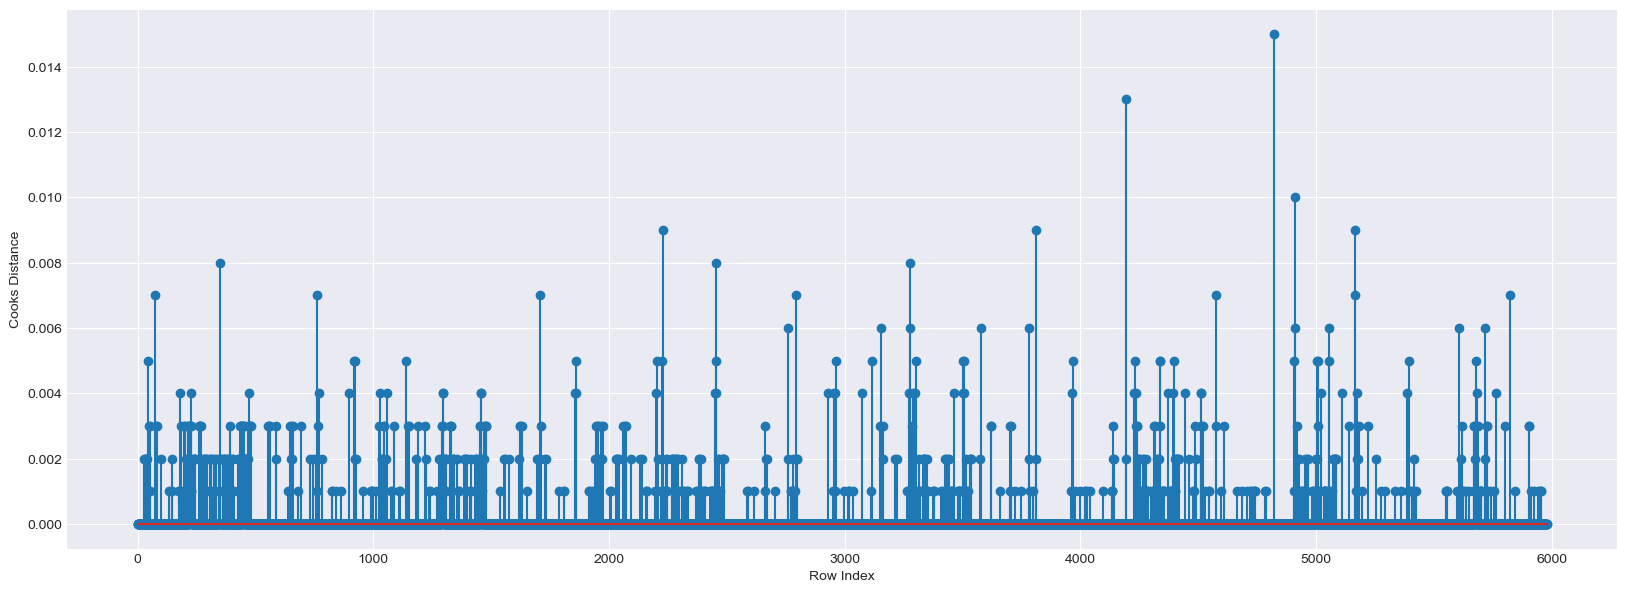

In [93]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [94]:
from statsmodels.graphics.regressionplots import influence_plot

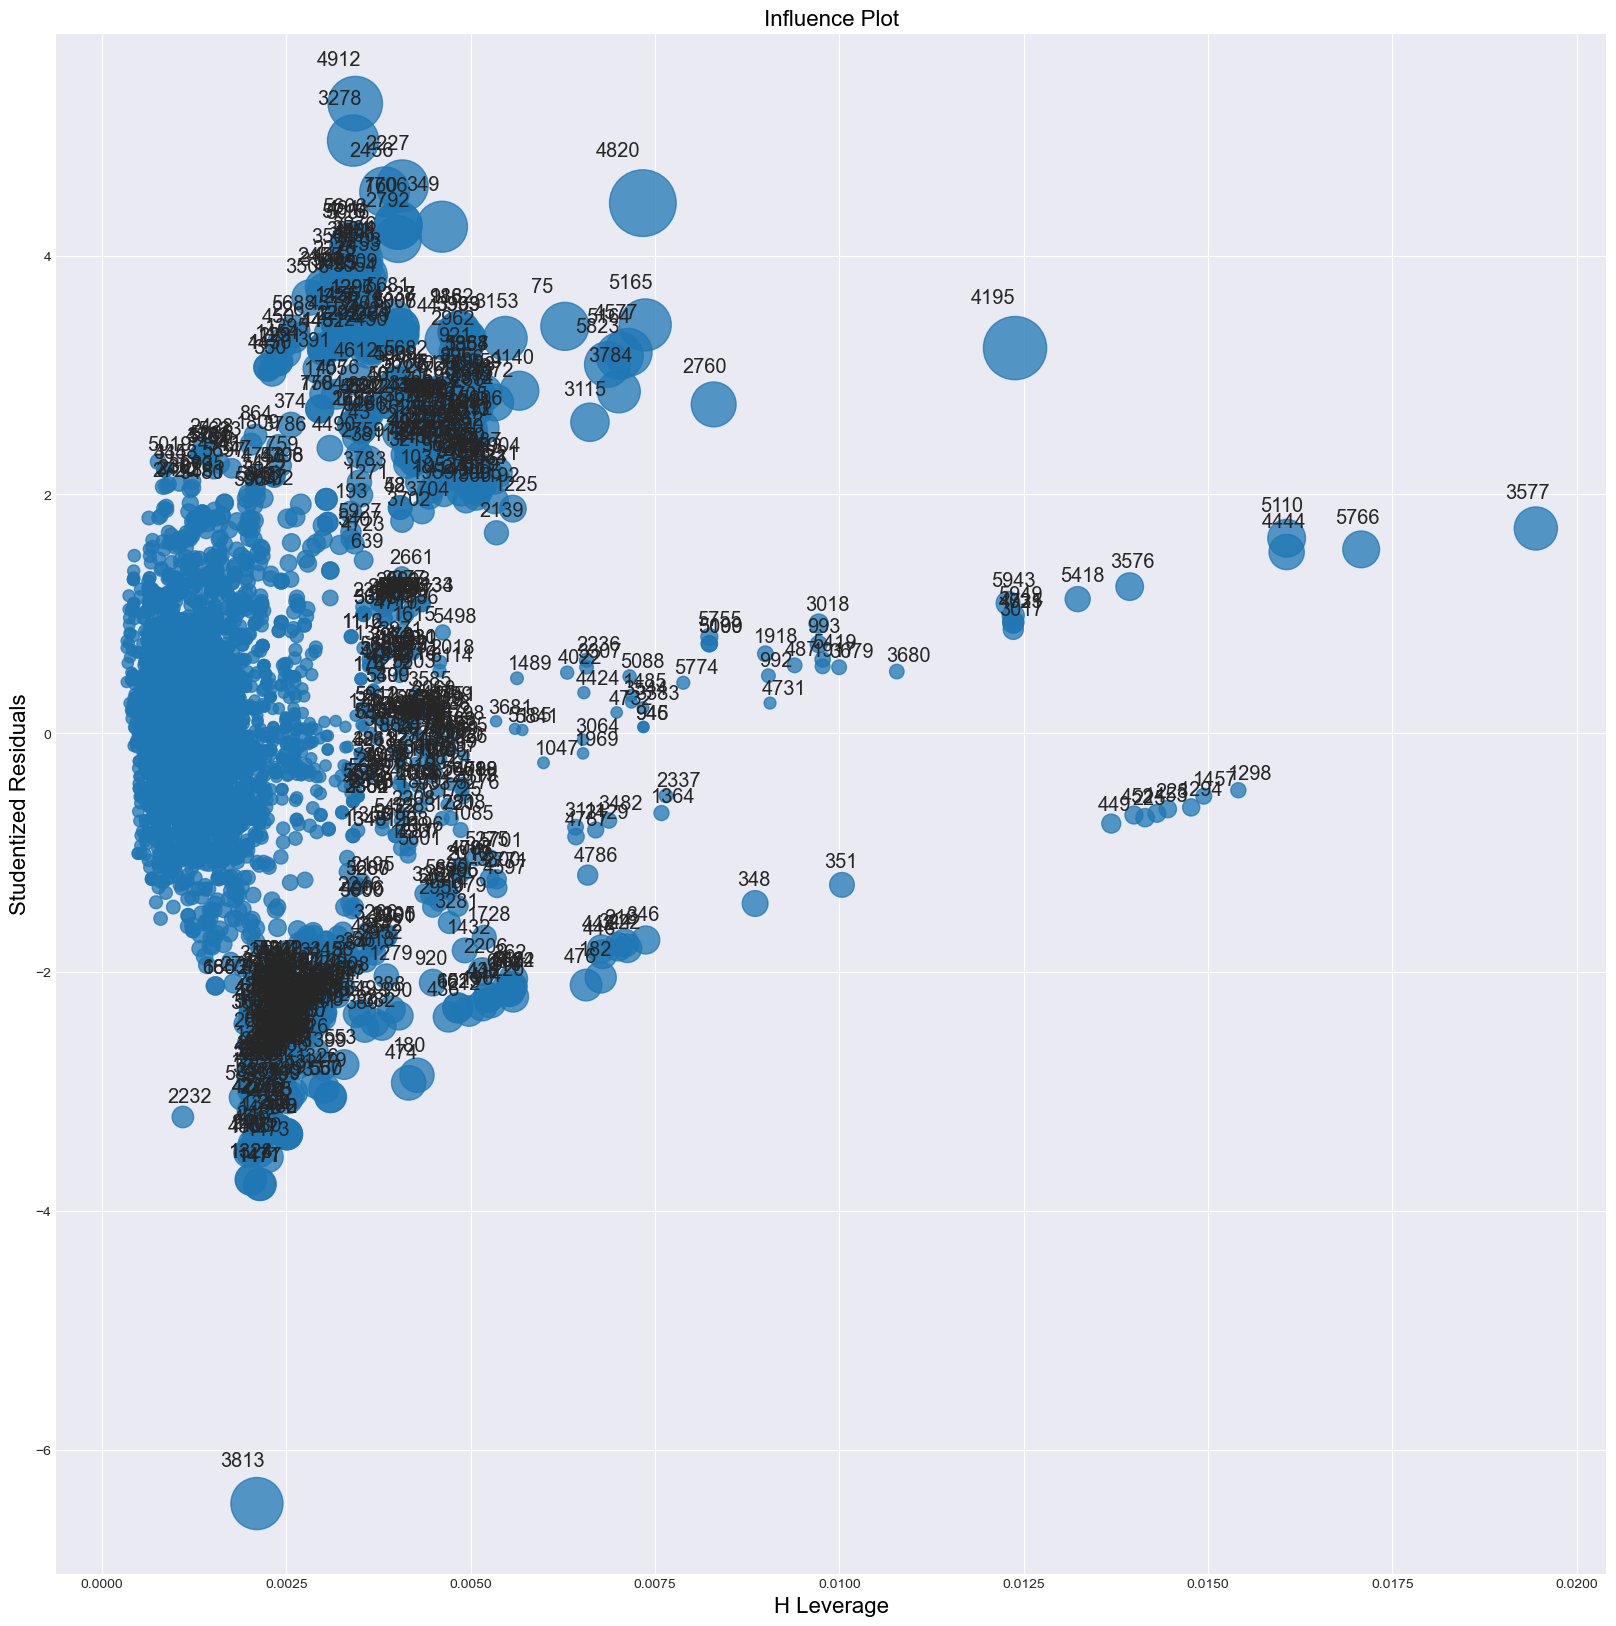

In [95]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(MLR_model,ax = ax)

In [96]:

 while np.max(c)>0.5 :
    MLR_model=smf.ols('co2_emissions~make+model+vehicle_class+engine_size+cylinders+transmission+fuel_type+fuel_consumpution+fuel_consumption_mpg',data=data).fit()    
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data=data.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data
else:
    final_MLR_model=smf.ols('co2_emissions~make+model+vehicle_class+engine_size+cylinders+transmission+fuel_type+fuel_consumpution+fuel_consumption_mpg',data=data).fit()
    final_MLR_model.rsquared , final_MLR_model.aic
    print("This model accuracy is improved to",final_MLR_model.rsquared)

This model accuracy is improved to 0.9131926340746667


In [97]:
pred=final_MLR_model.predict(data)
pred

0       200.668616
1       221.344155
2       138.821761
3       269.016947
4       260.100250
           ...    
5976    228.035434
5977    234.430885
5978    242.685817
5979    235.198404
5980    249.089910
Length: 5981, dtype: float64

In [98]:
output_data1=pd.DataFrame({'Predicted Values': pred, 'Actual Values': target})
output_data1.head(10)

,Predicted Values,Actual Values
0,200.668616,196
1,221.344155,221
2,138.821761,136
3,269.016947,255
4,260.100250,244
5,246.093681,230
6,246.937698,232
7,263.459228,255
8,269.515636,267
9,213.691668,212


In [99]:
dt_scores = evaluate_model(dt_regressor, x_test, y_test)
rf_scores = evaluate_model(rf_regressor, x_test, y_test)
print("Dt_regression", dt_scores)
print("rf_regression", rf_scores)

Dt_regression {'MSE': 57.539676700111485, 'RMSE': 7.294167263200069, 'R-squared': 0.9869107182467827, 'bagging_score': 0.9871265913448498, 'boosting_score': 0.9882977717543419}
rf_regression {'MSE': 33.441019218039926, 'RMSE': 5.258710546844482, 'R-squared': 0.990319213204162, 'bagging_score': 0.9906743907416047, 'boosting_score': 0.9909157262697242}
